# TS Slicing, Interpolations & Joins

Any data are Time Series when they are ingested. One of the major problem is when it comes to cleaning. Most of TS models need to have equally sliced data and not a lot of software propose an easy way to slice a timestamp.

Beyond that problem, missing values can distort predictions. Filling TS gaps is very important and it needs interpolation techniques.

VerticaPy gives you the possibility to easily slice and interpolate on TS data. Let's use the Smart Meter dataset to demonstrate this powerful functionality.

In [1]:
from verticapy import *

In [2]:
conn_info = {"host": "107.20.23.55", 
             "port": "5433", 
             "database": "testdrive", 
             "password": "password", 
             "user": "dbadmin"}
# Save a new connection
new_auto_connection(conn_info, name = "pranjs_cluster")
# Set the main auto connection
change_auto_connection("pranjs_cluster")

The table "public"."sm_consumption" has been successfully created.
The table "public"."sm_weather" has been successfully created.
The table "public"."sm_meters" has been successfully created.


meterID    residenceType            latitude            longitude  
1            9                1     53.307294775666      -6.171585396401  
2           13                1    52.2330869136812     -7.0801397379672  
3           29                1    51.9025419059901    -8.45522362503022  
4           33                2    53.3786128724389    -6.26875699530572  
5           59                1    52.2124956730345    -7.11448302907311  
6           77                1    53.3709894952545    -6.37512943696882  
7           84                1    51.9123757703805    -8.46795169870626  
8           88                3    53.2391085904911    -6.15017286838827  
9          101                3    53.3616289723295     -6.3119753675957  
10         106                1    53.3388235245009    -6.28855985505165  
11         121                1    53.3183006407361    -6.33144322820928  
12         122                1    53.3948352914632    -6.32464880430075  
13         129                3    53.2847538167363    -6.20482406171208  
14         137                1    52.6153030680094    -8.58172406887599  
15         142                3    53.3437625537282    -6.25055239931432  
16         144                1    53.3465160413708    -6.27393879256339  
17         146                1    52.2150719053984    -7.21839352345986  
18         148                1     53.355829024404    -6.27015926907847  
19         166                3    53.2942144203097     -6.1958271627739  
20         179                3    51.8479143358245    -8.49484731378788  
21         199                1    51.9175193609608    -8.47540516516904  
22         200                2    53.3110048895668    -6.26101898850356  
23         223                3    53.1431055469257    -6.09465343959965  
24         230                1    53.3666361932003    -6.23028864079411  
25         236                3    53.3276859038213    -6.26712298839384  
26         237                3     51.975347792212    -8.39294333154322  
27         253                1    53.3155371815513    -6.36053538201825  
28         261                3    53.6050023651224    -6.65330623468335  
29         266                1    51.9948091634808    -8.50536640168527  
30         268                3    53.3267675161204    -6.25566638934873  
31         273                3    53.3070208938664    -6.20511812128321  
32         276                3    53.4062020010827    -6.30993346953582  
33         283                1    53.3798320857778    -6.23548938170447  
34         292                1     53.385037725165    -6.25905485006652  
35         297                3    53.2528754412351    -6.21884247262343  
36         302                1    52.6710241238318    -8.56325246285804  
37         303                1    52.6915604209888    -8.66742005913281  
38         309                1     51.883446841047    -8.41568626465356  
39         313                3    53.3608155056306    -6.24470157303079  
40         322                1    53.3730172761191    -6.21916347381996  
41         328                3    52.2759553680317    -7.01532260362725  
42         344                1    53.3015391046692    -6.30765540012198  
43         372                3    53.4557376024458    -6.28529276388743  
44         375                1    53.2805896911074    -6.16001422634876  
45         376                3    52.6451149321863    -8.61610938592357  
46         379                1    53.3782750337982    -6.20084808950664  
47         389                1    53.3297291889016    -6.22480293060969  
48         393                1    51.9422454433936    -8.42390815673953  
49         398                1    51.9022657141561    -8.43002605453125  
50         403                1    53.3709141228359    -6.28873617521026  
51         404                1    53.3919890092062    -6.30603016324244  
52         410                3    53.3377822191319    -6.33718303324534  
53         422                1 
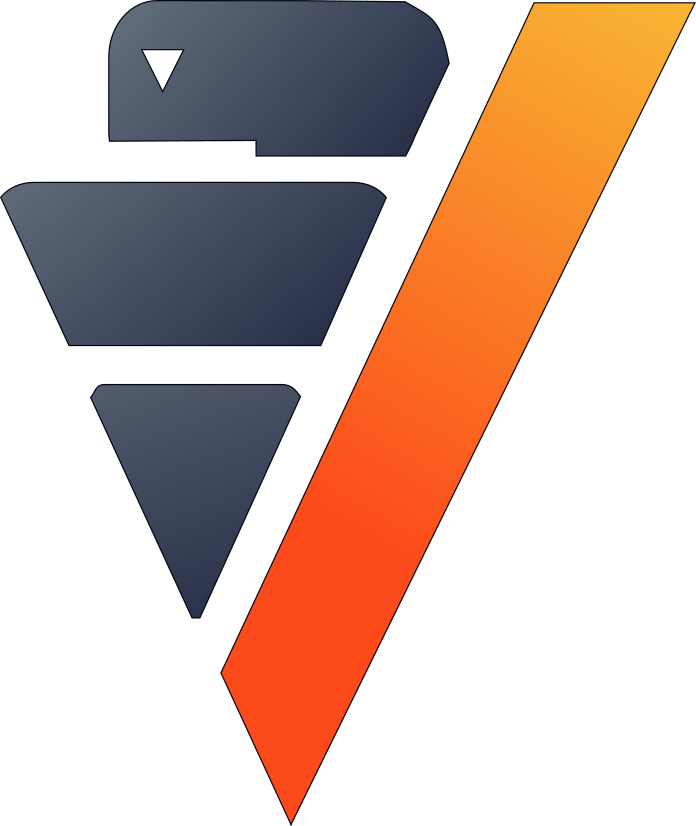

In [5]:
from verticapy import read_csv
read_csv('sm_consumption.csv', schema = 'public', table_name = 'sm_consumption', sep = ',')
read_csv('sm_weather.csv', schema = 'public', table_name = 'sm_weather', sep = ',')
read_csv('sm_meters.csv', schema = 'public', table_name = 'sm_meters', sep = ',')

In [4]:
drop('public.sm_consumption')
drop('public.sm_weather')
drop('public.sm_meters')

True

meterID                dateUTC    value  
1            0    2014-01-12 07:45:00    0.091  
2            0    2014-01-14 13:00:00    0.099  
3            0    2014-01-16 19:30:00    1.422  
4            0    2014-02-08 03:45:00    0.043  
5            0    2014-02-11 02:30:00    0.087  
6            0    2014-02-11 05:30:00    0.039  
7            0    2014-02-21 13:15:00    0.571  
8            0    2014-02-23 14:45:00     0.75  
9            0    2014-03-07 14:30:00    0.317  
10           0    2014-03-11 10:00:00    0.023  
11           0    2014-03-25 22:00:00    0.075  
12           0    2014-03-29 06:15:00    0.055  
13           0    2014-04-07 13:30:00    1.452  
14           0    2014-04-10 19:15:00    0.169  
15           0    2014-04-16 17:00:00    0.892  
16           0    2014-04-28 03:45:00    0.066  
17           0    2014-04-29 15:15:00    0.062  
18           0    2014-04-30 11:45:00    0.058  
19           0    2014-05-03 01:30:00    0.049  
20           0    2014-05-11 05:30:00    0.018  
21           0    2014-05-18 21:00:00    0.367  
22           0    2014-05-18 22:15:00    0.548  
23           0    2014-06-05 12:30:00    0.484  
24           0    2014-06-06 02:30:00    0.085  
25           0    2014-06-10 05:00:00    0.109  
26           0    2014-06-11 12:00:00     0.02  
27           0    2014-06-14 14:00:00    0.016  
28           0    2014-06-16 18:30:00     0.78  
29           0    2014-06-19 23:15:00    0.999  
30           0    2014-06-30 08:30:00    0.052  
31           0    2014-06-30 13:00:00    0.156  
32           0    2014-07-10 12:45:00    0.163  
33           0    2014-07-27 14:15:00    0.307  
34           0    2014-07-31 13:15:00    2.054  
35           0    2014-08-08 00:15:00     0.04  
36           0    2014-08-13 08:30:00    0.043  
37           0    2014-08-18 11:45:00    0.182  
38           0    2014-08-20 21:15:00    0.292  
39           0    2014-09-04 05:00:00     0.01  
40           0    2014-09-13 11:30:00     0.02  
41           0    2014-09-14 18:45:00    0.141  
42           0    2014-09-20 05:45:00    0.245  
43           0    2014-09-30 16:15:00    0.063  
44           0    2014-10-04 14:15:00    0.336  
45           0    2014-10-05 19:30:00    0.179  
46           0    2014-10-19 02:15:00    0.039  
47           0    2014-10-28 03:00:00    0.023  
48           0    2014-11-09 15:00:00    4.133  
49           0    2014-11-21 12:45:00    0.538  
50           0    2014-11-22 21:15:00    0.229  
51           0    2014-11-27 23:00:00    0.678  
52           0    2014-11-28 05:15:00    0.064  
53           0    2014-12-01 15:15:00    0.173  
54           0    2014-12-10 14:00:00    1.711  
55           0    2014-12-14 14:00:00    1.177  
56           0    2014-12-25 14:45:00    0.137  
57           0    2015-01-16 11:15:00    0.072  
58           0    2015-01-24 07:00:00     0.22  
59           0    2015-02-06 16:15:00    0.048  
60           0    2015-02-08 07:30:00    0.063  
61           0    2015-02-10 18:30:00    0.048  
62           0    2015-02-21 20:15:00    1.207  
63           0    2015-03-03 05:00:00    0.061  
64           0    2015-03-06 11:30:00    0.111  
65           0    2015-03-21 19:15:00     0.75  
66           0    2015-03-29 03:45:00    0.051  
67           0    2015-04-06 06:30:00    0.022  
68           0    2015-04-13 19:00:00    0.189  
69           0    2015-04-16 06:00:00    0.144  
70           0    2015-04-24 00:00:00    0.038  
71           0    2015-05-02 03:15:00    0.025  
72           0    2015-05-05 10:15:00    0.114  
73           0    2015-05-18 19:45:00    0.075  
74           0    2015-05-19 23:45:00    0.189  
75           0    2015-05-26 08:15:00    0.082  
76           0    2015-06-11 01:30:00    0.221  
77           0    2015-06-15 04:30:00    0.001  
78           0    2015-06-19 00:15:00    0.161  
79           0    2015-06-22 00:30:00    0.109  
80           0    2015-07-06 14:45:00    0.275  
81           0    2015-07-10 12:45:00 
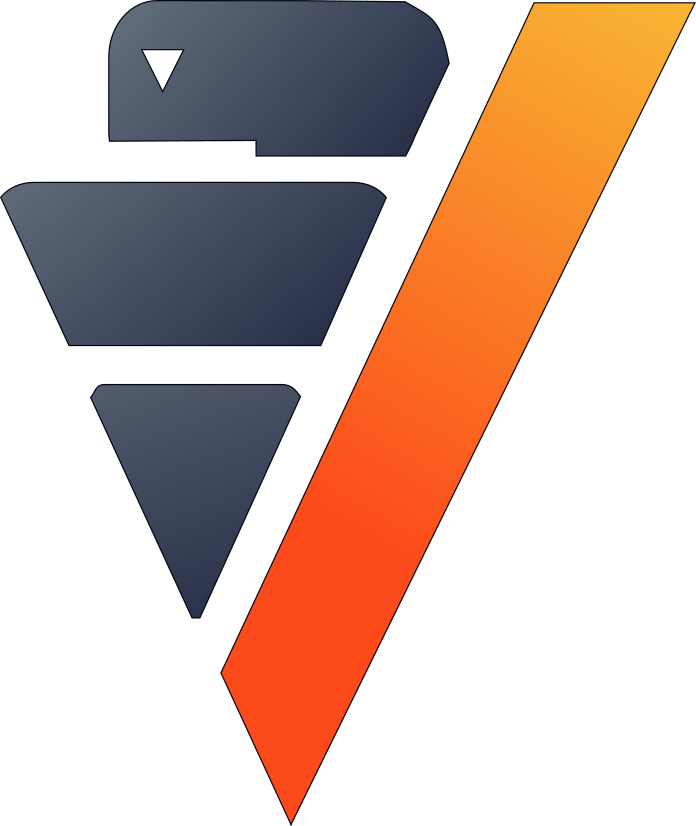

In [6]:
sm_consumption = vDataFrame("sm_consumption")
sm_meters = vDataFrame('sm_meters')
display(sm_consumption)

count                 mean                  std    min   \\
"meterID"      1188432     499.853432085306      288.60245384597    0.0   \\
"value"        1188412    0.334715898585675    0.672138021272073    0.0   \\
                      approx_25%           approx_50%           approx_75%   \\
"meterID"                  250.0                500.0                750.0   \\
"value"        0.071003807106599    0.151002409090909    0.356002965599051   \\
                  max  
"meterID"       999.0  
"value"        34.724  
Rows: 1-2 | Columns: 9
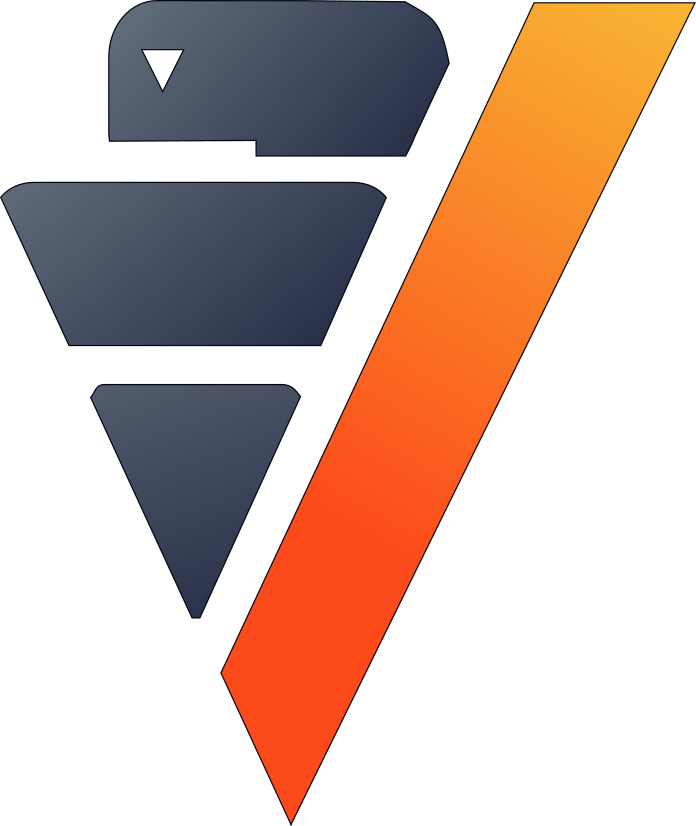

In [7]:
sm_consumption.describe()

We can clearly see many gaps.

Let's slice and interpolate the energy consumption each 30 minutes.

dateUTC    meterID                 value  
1      2014-01-01 11:00:00          0                 0.029  
2      2014-01-01 11:30:00          0    0.0740909090909091  
3      2014-01-01 12:00:00          0     0.119181818181818  
4      2014-01-01 12:30:00          0     0.164272727272727  
5      2014-01-01 13:00:00          0     0.209363636363636  
6      2014-01-01 13:30:00          0     0.254454545454545  
7      2014-01-01 14:00:00          0      0.27752380952381  
8      2014-01-01 14:30:00          0     0.278571428571429  
9      2014-01-01 15:00:00          0     0.279619047619048  
10     2014-01-01 15:30:00          0     0.280666666666667  
11     2014-01-01 16:00:00          0     0.281714285714286  
12     2014-01-01 16:30:00          0     0.282761904761905  
13     2014-01-01 17:00:00          0     0.283809523809524  
14     2014-01-01 17:30:00          0     0.284857142857143  
15     2014-01-01 18:00:00          0     0.285904761904762  
16     2014-01-01 18:30:00          0     0.286952380952381  
17     2014-01-01 19:00:00          0                 0.288  
18     2014-01-01 19:30:00          0     0.289047619047619  
19     2014-01-01 20:00:00          0     0.290095238095238  
20     2014-01-01 20:30:00          0     0.291142857142857  
21     2014-01-01 21:00:00          0     0.292190476190476  
22     2014-01-01 21:30:00          0     0.293238095238095  
23     2014-01-01 22:00:00          0     0.294285714285714  
24     2014-01-01 22:30:00          0     0.295333333333333  
25     2014-01-01 23:00:00          0     0.296380952380952  
26     2014-01-01 23:30:00          0     0.297428571428571  
27     2014-01-02 00:00:00          0     0.298476190476191  
28     2014-01-02 00:30:00          0      0.29952380952381  
29     2014-01-02 01:00:00          0     0.300571428571429  
30     2014-01-02 01:30:00          0     0.301619047619048  
31     2014-01-02 02:00:00          0     0.302666666666667  
32     2014-01-02 02:30:00          0     0.303714285714286  
33     2014-01-02 03:00:00          0     0.304761904761905  
34     2014-01-02 03:30:00          0     0.305809523809524  
35     2014-01-02 04:00:00          0     0.306857142857143  
36     2014-01-02 04:30:00          0     0.307904761904762  
37     2014-01-02 05:00:00          0     0.308952380952381  
38     2014-01-02 05:30:00          0                  0.31  
39     2014-01-02 06:00:00          0     0.311047619047619  
40     2014-01-02 06:30:00          0     0.312095238095238  
41     2014-01-02 07:00:00          0     0.313142857142857  
42     2014-01-02 07:30:00          0     0.314190476190476  
43     2014-01-02 08:00:00          0     0.315238095238095  
44     2014-01-02 08:30:00          0     0.316285714285714  
45     2014-01-02 09:00:00          0     0.317333333333333  
46     2014-01-02 09:30:00          0     0.318380952380952  
47     2014-01-02 10:00:00          0     0.319428571428571  
48     2014-01-02 10:30:00          0      0.32047619047619  
49     2014-01-02 11:00:00          0                 0.313  
50     2014-01-02 11:30:00          0                0.3103  
51     2014-01-02 12:00:00          0                0.3209  
52     2014-01-02 12:30:00          0                0.3315  
53     2014-01-02 13:00:00          0                0.3421  
54     2014-01-02 13:30:00          0                0.3527  
55     2014-01-02 14:00:00          0     0.323285714285714  
56     2014-01-02 14:30:00          0     0.253857142857143  
57     2014-01-02 15:00:00          0     0.184428571428571  
58     2014-01-02 15:30:00          0                 0.115  
59     2014-01-02 16:00:00          0     0.113705882352941  
60     2014-01-02 16:30:00          0     0.112411764705882  
61     2014-01-02 17:00:00          0     0.111117647058824  
62     2014-01-02 17:30:00          0     0.109823529411765  
63     2014-01-02 18:00:00          0     0.108529411764706  
64     2014-01-02 18:30:00          0     0.1072352
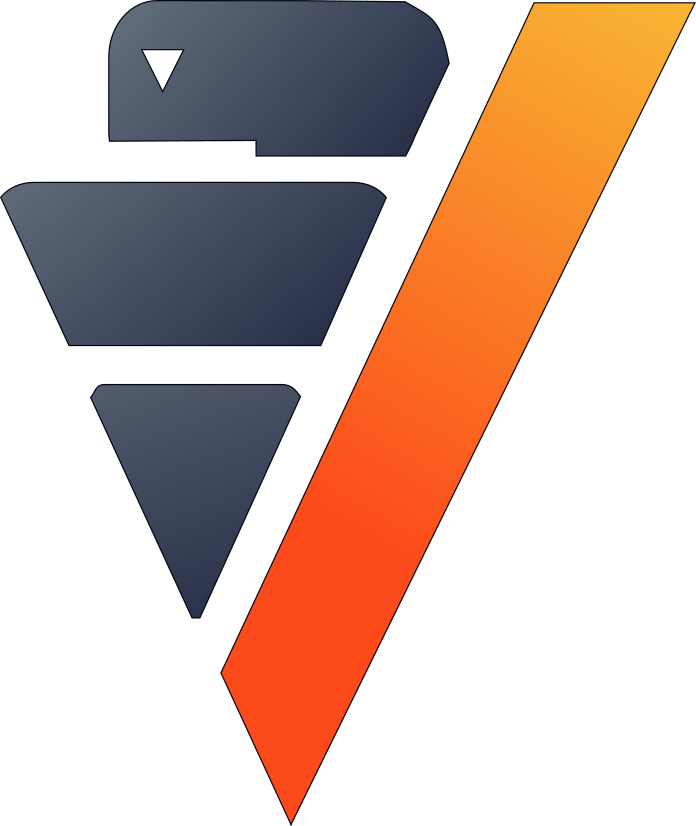

In [8]:
interpolate = sm_consumption.asfreq(ts = "dateUTC",
                                    rule = "30 minutes",
                                    method = {"value": "linear"},
                                    by = ["meterID"])
display(interpolate)

In VerticaPy, slicing and interpolating are very easy to achieve. It is thanks to Vertica built-in functionnalities. Indeed, the Vertica TIMESERIES clause will be used during the computation.

In [9]:
print(interpolate.current_relation())

(
   SELECT
     "dateUTC",
     "meterID",
     "value" 
   FROM
 (
   SELECT
     slice_time AS "dateUTC",
     "meterID",
     TS_FIRST_VALUE("value", 'linear') AS "value" 
   FROM
 "public"."sm_consumption" TIMESERIES slice_time AS '30 minutes' OVER (PARTITION BY "meterID" ORDER BY "dateUTC"::timestamp)) interpolate) 
VERTICAPY_SUBTABLE


Having sliced data on regular interval of time can be important to easily join other data sources. Let's consider the 'weather' dataset which can be joined to the 'smart_meters_consumption' dataset on the date.

dateUTC    temperature    humidity  
1      2014-01-01 03:00:00           39.2        93.0  
2      2014-01-01 07:00:00           37.4        93.0  
3      2014-01-01 13:30:00           39.2        87.0  
4      2014-01-01 19:00:00           35.6        87.0  
5      2014-01-01 20:30:00           39.2        87.0  
6      2014-01-01 22:30:00           39.2        87.0  
7      2014-01-01 23:00:00           39.2        87.0  
8      2014-01-02 00:00:00           38.0        76.0  
9      2014-01-02 02:00:00           37.4        81.0  
10     2014-01-02 03:00:00           37.4        81.0  
11     2014-01-02 03:30:00           37.4        81.0  
12     2014-01-02 05:00:00           35.6        93.0  
13     2014-01-02 08:00:00           35.6        81.0  
14     2014-01-02 17:00:00           41.0        76.0  
15     2014-01-03 03:30:00           37.4        70.0  
16     2014-01-03 15:00:00           37.4        65.0  
17     2014-01-04 06:30:00           35.6        81.0  
18     2014-01-04 10:30:00           33.8       100.0  
19     2014-01-04 17:30:00           32.0       100.0  
20     2014-01-04 18:00:00           31.0       100.0  
21     2014-01-04 19:30:00           30.2       100.0  
22     2014-01-05 02:00:00           24.8       100.0  
23     2014-01-05 19:30:00           32.0        80.0  
24     2014-01-05 21:00:00           30.2        80.0  
25     2014-01-06 06:00:00           34.0        46.0  
26     2014-01-06 11:30:00           32.0        75.0  
27     2014-01-06 15:30:00           33.8        65.0  
28     2014-01-06 16:00:00           32.0        69.0  
29     2014-01-06 16:30:00           30.2        75.0  
30     2014-01-07 10:30:00           32.0        80.0  
31     2014-01-07 14:30:00           37.4        70.0  
32     2014-01-07 15:00:00           37.4        65.0  
33     2014-01-07 17:00:00           33.8        81.0  
34     2014-01-07 17:30:00           32.0        80.0  
35     2014-01-07 22:30:00           30.2        86.0  
36     2014-01-08 05:30:00           33.8        93.0  
37     2014-01-08 07:00:00           35.6        93.0  
38     2014-01-08 07:30:00           35.6        87.0  
39     2014-01-08 09:00:00           33.8        87.0  
40     2014-01-08 10:00:00           37.4        75.0  
41     2014-01-08 14:00:00           41.0        65.0  
42     2014-01-08 21:00:00           35.6        81.0  
43     2014-01-09 12:30:00           42.8        70.0  
44     2014-01-09 17:00:00           37.4        75.0  
45     2014-01-10 04:30:00           42.8        66.0  
46     2014-01-10 20:00:00           48.2        76.0  
47     2014-01-10 21:00:00           48.2        76.0  
48     2014-01-10 22:00:00           48.2        82.0  
49     2014-01-11 00:30:00           48.2        87.0  
50     2014-01-11 23:00:00           51.8        94.0  
51     2014-01-12 00:00:00           48.0        94.0  
52     2014-01-12 04:00:00           48.2        87.0  
53     2014-01-12 04:30:00           48.2        87.0  
54     2014-01-12 22:00:00           44.6        93.0  
55     2014-01-12 22:30:00           42.8        93.0  
56     2014-01-13 00:30:00           42.8       100.0  
57     2014-01-13 06:00:00           41.0        89.0  
58     2014-01-14 00:00:00           36.0        92.0  
59     2014-01-14 11:00:00           42.8        87.0  
60     2014-01-14 20:00:00           51.8        82.0  
61     2014-01-14 21:30:00           48.2       100.0  
62     2014-01-14 23:30:00           50.0        87.0  
63     2014-01-15 03:30:00           50.0        87.0  
64     2014-01-15 04:30:00           50.0        87.0  
65     2014-01-15 06:00:00           49.0        92.0  
66     2014-01-15 11:00:00           51.8        76.0  
67     2014-01-15 15:30:00           50.0        76.0  
68     2014-01-15 20:00:00           46.4        93.0  
69     2014-01-16 04:00:00           42.8        93.0  
70     2014-01-16 11:30:00           46.4        81.0  
71     2014-01-16 17:30:00           46.4  
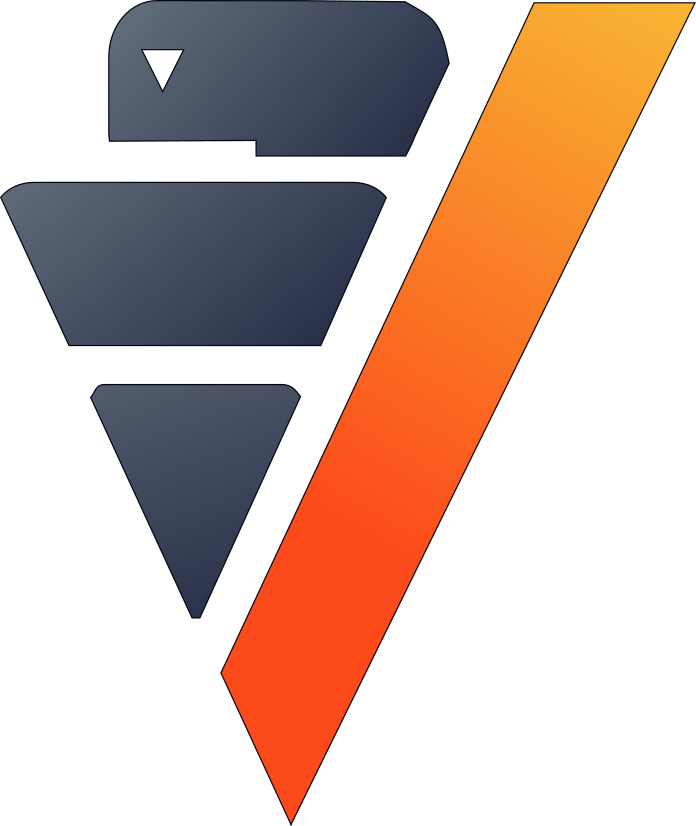

In [10]:
sm_weather = vDataFrame("sm_weather")
display(sm_weather)

We can notice that the data were ingested at regular time interval (30 minutes). We can then easily join the data using as key the 'dateUTC'.

dateUTC    meterID                 value    temperature   \\
1      2014-01-01 07:30:00          5    0.0882857142857143           37.4   \\
2      2014-01-01 08:00:00          5    0.0937142857142857           37.4   \\
3      2014-01-01 10:00:00          5     0.115428571428571           37.4   \\
4      2014-01-01 11:00:00          5     0.126285714285714           37.4   \\
5      2014-01-01 15:30:00          5      1.03147826086957           39.2   \\
6      2014-01-01 16:30:00          5      1.24382608695652           39.2   \\
7      2014-01-01 17:00:00          5                  1.35           39.2   \\
8      2014-01-01 18:00:00          5      1.25581818181818           38.0   \\
9      2014-01-01 18:30:00          5      1.20872727272727           37.4   \\
10     2014-01-01 21:00:00          5     0.973272727272727           39.2   \\
11     2014-01-02 00:00:00          5     0.690727272727273           38.0   \\
12     2014-01-02 00:30:00          5     0.643636363636364           37.4   \\
13     2014-01-02 01:30:00          5     0.549454545454545           37.4   \\
14     2014-01-02 04:30:00          5     0.266909090909091           35.6   \\
15     2014-01-02 07:00:00          5    0.0698695652173913           37.4   \\
16     2014-01-02 10:00:00          5     0.248304347826087           39.2   \\
17     2014-01-02 10:30:00          5      0.27804347826087           41.0   \\
18     2014-01-02 11:30:00          5     0.337521739130435           41.0   \\
19     2014-01-02 14:00:00          5     0.405622222222222           41.0   \\
20     2014-01-02 14:30:00          5     0.408496296296296           41.0   \\
21     2014-01-02 15:30:00          5     0.414244444444444           41.0   \\
22     2014-01-02 16:00:00          5     0.417118518518519           41.0   \\
23     2014-01-02 19:00:00          5     0.434362962962963           39.2   \\
24     2014-01-02 19:30:00          5     0.437237037037037           37.4   \\
25     2014-01-02 20:30:00          5     0.442985185185185           39.2   \\
26     2014-01-02 23:00:00          5     0.457355555555556           39.2   \\
27     2014-01-03 00:30:00          5     0.465977777777778           39.2   \\
28     2014-01-03 01:00:00          5     0.468851851851852           39.2   \\
29     2014-01-03 01:30:00          5     0.471725925925926           37.4   \\
30     2014-01-03 02:30:00          5     0.477474074074074           37.4   \\
31     2014-01-03 03:00:00          5     0.480348148148148           37.4   \\
32     2014-01-03 04:30:00          5      0.48897037037037           37.4   \\
33     2014-01-03 07:30:00          5     0.506214814814815           37.4   \\
34     2014-01-03 09:00:00          5     0.514837037037037           37.4   \\
35     2014-01-03 10:00:00          5     0.520585185185185           37.4   \\
36     2014-01-03 11:00:00          5     0.526333333333333           39.2   \\
37     2014-01-03 11:30:00          5     0.529207407407407           39.2   \\
38     2014-01-03 13:00:00          5      0.53782962962963           39.2   \\
39     2014-01-03 14:00:00          5     0.543577777777778           37.4   \\
40     2014-01-03 15:00:00          5     0.549325925925926           37.4   \\
41     2014-01-03 16:00:00          5     0.555074074074074           37.4   \\
42     2014-01-03 16:30:00          5     0.557948148148148           35.6   \\
43     2014-01-03 22:00:00          5     0.589562962962963           33.8   \\
44     2014-01-04 00:30:00          5                 0.388           33.8   \\
45     2014-01-04 02:30:00          5     0.207555555555556           35.6   \\
46     2014-01-04 04:30:00          5     0.229153846153846           35.6   \\
47     2014-01-04 06:30:00          5     0.264754901960784           35.6   \\
48     2014-01-04 08:00:00          5     0.258019607843137           35.6   \\
49     2014-01-04 10:00:00          5     0.249039215686275           33.8   \\
50     2014-01-04 1
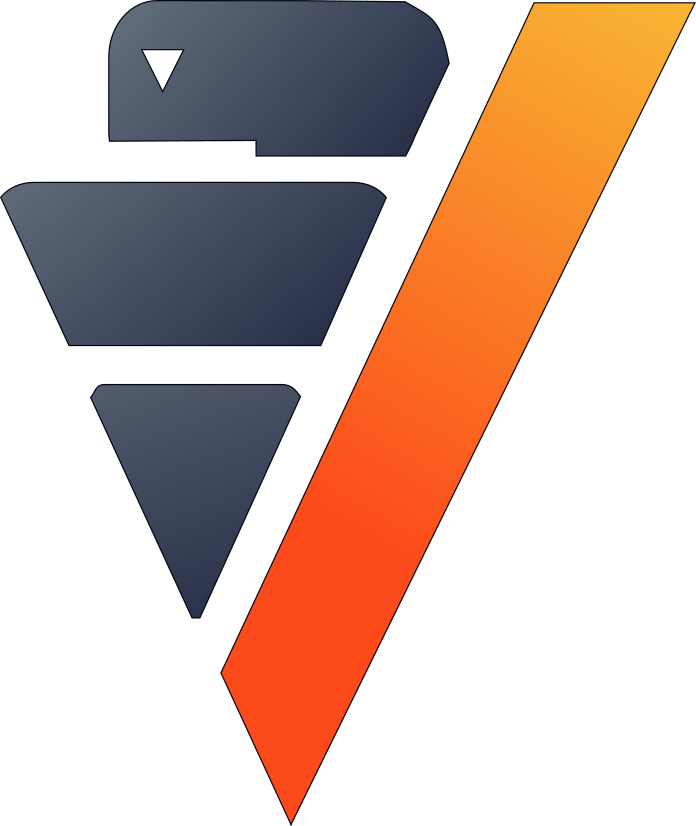

In [11]:
interpolate.join(sm_weather,
                 how = "left",
                 on = {"dateUTC": "dateUTC"},
                 expr2 = ["temperature", "humidity"])

We enriched our dataset.

However, TS slicing/interpolating & Joins can be very expensive. VerticaPy proposes also joins based on interpolation. This technique is very powerful. Vertica will find the closest TS to our key and merge the two records.

meterID                dateUTC    value    temperature   \\
1          913    2014-01-01 00:00:00    0.097           38.0   \\
2          895    2014-01-01 00:00:00    0.184           38.0   \\
3          795    2014-01-01 00:00:00    0.093           38.0   \\
4          780    2014-01-01 00:00:00    0.116           38.0   \\
5          747    2014-01-01 00:00:00    0.559           38.0   \\
6          660    2014-01-01 00:00:00    0.836           38.0   \\
7          640    2014-01-01 00:00:00    1.796           38.0   \\
8          605    2014-01-01 00:00:00    0.038           38.0   \\
9          484    2014-01-01 00:00:00    0.211           38.0   \\
10         474    2014-01-01 00:00:00    0.313           38.0   \\
11         457    2014-01-01 00:00:00    0.022           38.0   \\
12         371    2014-01-01 00:00:00    0.815           38.0   \\
13         355    2014-01-01 00:00:00    0.448           38.0   \\
14         348    2014-01-01 00:00:00    0.071           38.0   \\
15         307    2014-01-01 00:00:00    1.423           38.0   \\
16         188    2014-01-01 00:00:00    0.152           38.0   \\
17         181    2014-01-01 00:00:00    0.138           38.0   \\
18         179    2014-01-01 00:00:00    0.033           38.0   \\
19         129    2014-01-01 00:00:00    0.054           38.0   \\
20         116    2014-01-01 00:00:00    0.232           38.0   \\
21         986    2014-01-01 00:15:00    0.301           38.0   \\
22         848    2014-01-01 00:15:00    0.186           38.0   \\
23         829    2014-01-01 00:15:00    0.145           38.0   \\
24         718    2014-01-01 00:15:00    0.091           38.0   \\
25         637    2014-01-01 00:15:00    0.319           38.0   \\
26         625    2014-01-01 00:15:00    0.141           38.0   \\
27         619    2014-01-01 00:15:00    0.103           38.0   \\
28         583    2014-01-01 00:15:00    4.081           38.0   \\
29         444    2014-01-01 00:15:00    0.131           38.0   \\
30         221    2014-01-01 00:15:00    0.399           38.0   \\
31          67    2014-01-01 00:15:00    0.157           38.0   \\
32          52    2014-01-01 00:15:00    0.157           38.0   \\
33         933    2014-01-01 00:30:00    0.061           37.4   \\
34         930    2014-01-01 00:30:00    0.202           37.4   \\
35         904    2014-01-01 00:30:00    0.159           37.4   \\
36         829    2014-01-01 00:30:00    0.082           37.4   \\
37         796    2014-01-01 00:30:00    0.237           37.4   \\
38         663    2014-01-01 00:30:00     0.08           37.4   \\
39         628    2014-01-01 00:30:00    1.246           37.4   \\
40         626    2014-01-01 00:30:00    0.106           37.4   \\
41         618    2014-01-01 00:30:00    0.067           37.4   \\
42         506    2014-01-01 00:30:00    0.108           37.4   \\
43         497    2014-01-01 00:30:00    0.144           37.4   \\
44         460    2014-01-01 00:30:00    0.094           37.4   \\
45         376    2014-01-01 00:30:00    0.129           37.4   \\
46         332    2014-01-01 00:30:00    0.044           37.4   \\
47         308    2014-01-01 00:30:00    0.045           37.4   \\
48         286    2014-01-01 00:30:00    0.209           37.4   \\
49         277    2014-01-01 00:30:00    0.287           37.4   \\
50         264    2014-01-01 00:30:00    0.162           37.4   \\
51         138    2014-01-01 00:30:00    2.276           37.4   \\
52          90    2014-01-01 00:30:00    0.183           37.4   \\
53         977    2014-01-01 00:45:00    0.176           37.4   \\
54         937    2014-01-01 00:45:00    0.201           37.4   \\
55         927    2014-01-01 00:45:00    0.551           37.4   \\
56         867    2014-01-01 00:45:00    0.844           37.4   \\
57         762    2014-01-01 00:45:00     0.13           37.4   \\
58         528    2014-01-01 00:45:00    0.067           37.4   \\
59         447    2014-01-01 00:45:00    0.599        
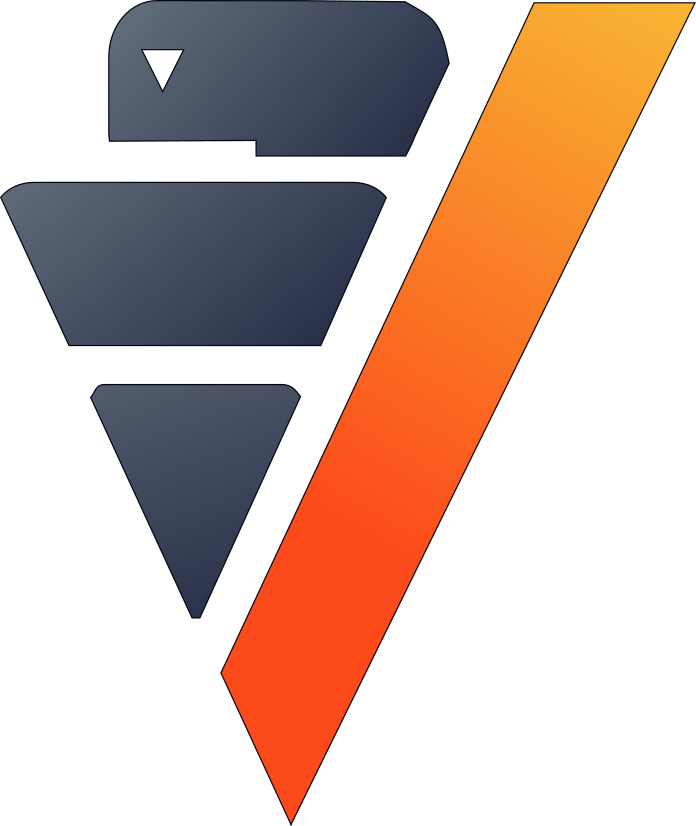

In [12]:
sm_consumption.join(sm_weather,
                    how = "left",
                    on_interpolate = {"dateUTC": "dateUTC"},
                    expr2 = ["temperature", "humidity"])

The easiness resides on the Vertica built-in clauses.

In [13]:
print(sm_consumption.join(sm_weather,
                          how = "left",
                          on_interpolate = {"dateUTC": "dateUTC"},
                          expr2 = ["temperature", "humidity"]).current_relation())

(
   SELECT
     "meterID",
     "dateUTC",
     "value",
     "temperature",
     "humidity" 
   FROM
 (
   SELECT
     x.*,
     y.temperature,
     y.humidity 
   FROM
 "public"."sm_consumption" AS x LEFT JOIN "public"."sm_weather" AS y  ON x."dateUTC" INTERPOLATE PREVIOUS VALUE y."dateUTC") 
VERTICAPY_SUBTABLE) 
VERTICAPY_SUBTABLE


Vertica offers many possibilities for cleaning TS data. Many models are also available to do dynamic forecast.

In [ ]:
drop('KMeans_sm3')

In [14]:
from verticapy.learn.cluster import KMeans
model = KMeans("KMeans_sm3", n_cluster = 6)

<AxesSubplot:xlabel='"latitude"', ylabel='"longitude"'>

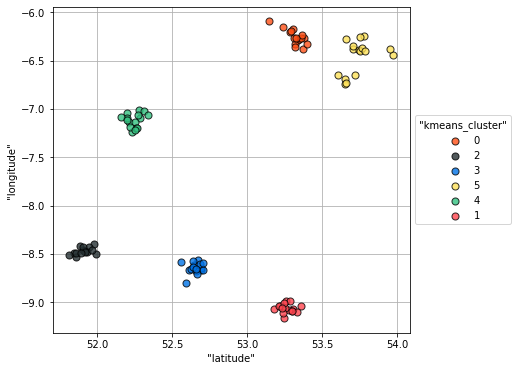

In [15]:
model.fit("sm_meters", ["latitude", "longitude"])
model.plot()

value  
Between-Cluster Sum of Squares                    1201.502  
Total Sum of Squares                             1209.2077  
Total Within-Cluster Sum of Squares              7.7057075  
Between-Cluster SS / Total SS            0.993627480208735  
converged                                             True  
Rows: 1-5 | Columns: 2
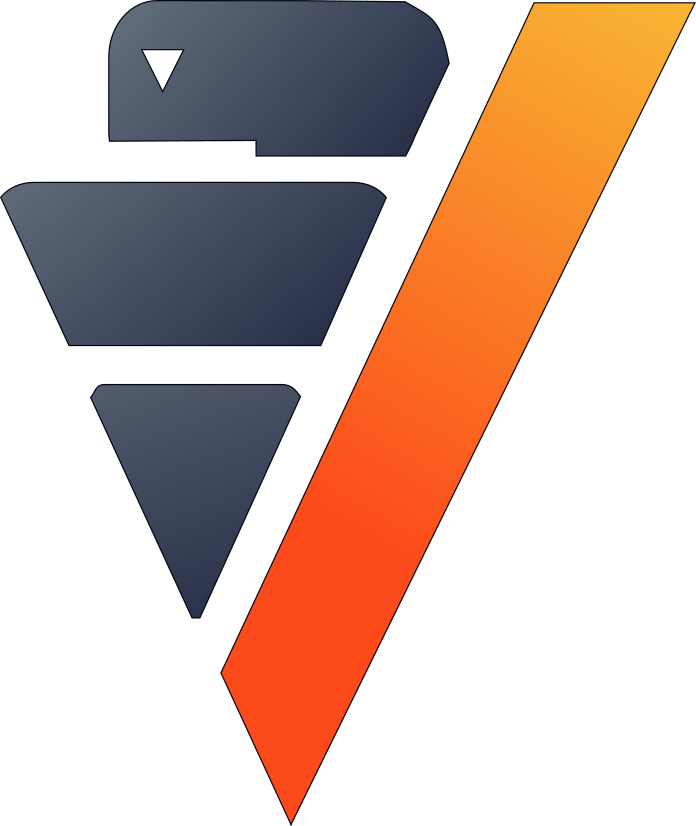

In [16]:
model.metrics_

Sum of squares...

Internal cohesion : External Seperation

Closer to 1 is better

In [ ]:
model.to_sql()

In [ ]:
print(model.to_python(return_str = True))

In [ ]:
# Getting in-memory predictions
model.to_python()([[53.9,-6.4], [52.3, -7.1]])

min                  max  
"meterID"                          0.0                999.0  
"residenceType"                    1.0                  3.0  
"latitude"            51.7964600770212     54.0270361317983  
"longitude"          -9.16352332036362    -6.07134572494937  
Rows: 1-4 | Columns: 3
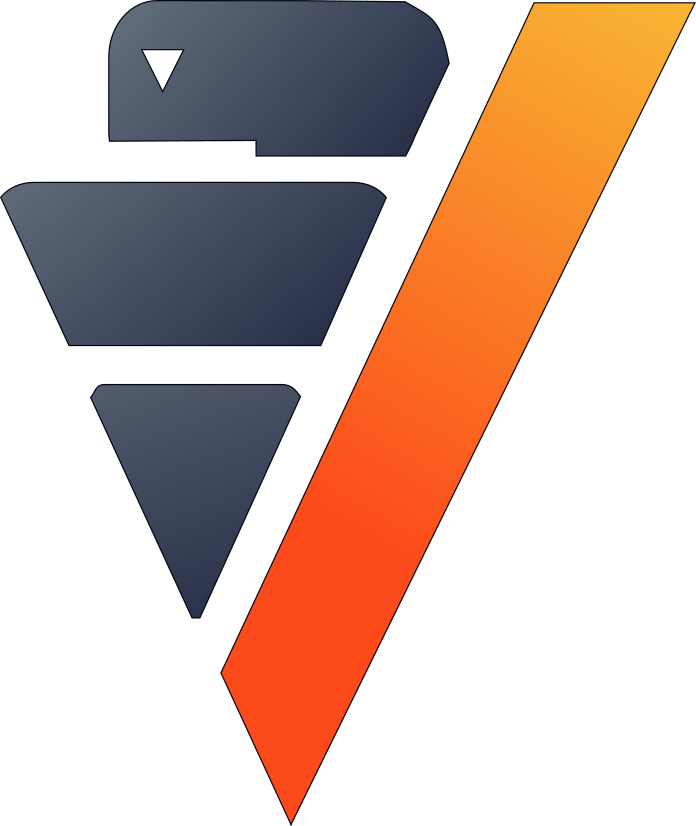

In [17]:
sm_meters.agg(["min", "max"])

In order to join the different data sources, we need to assume that the weather will be approximately the same across the entirety of Ireland. We'll use the date and time as the key to join 'sm_weather' and 'sm_consumption'.

dateUTC    meterID    value    humidity   \\
1      2014-01-01 00:00:00        913    0.097        95.0   \\
2      2014-01-01 00:00:00        895    0.184        95.0   \\
3      2014-01-01 00:00:00        795    0.093        95.0   \\
4      2014-01-01 00:00:00        780    0.116        95.0   \\
5      2014-01-01 00:00:00        747    0.559        95.0   \\
6      2014-01-01 00:00:00        660    0.836        95.0   \\
7      2014-01-01 00:00:00        640    1.796        95.0   \\
8      2014-01-01 00:00:00        605    0.038        95.0   \\
9      2014-01-01 00:00:00        484    0.211        95.0   \\
10     2014-01-01 00:00:00        474    0.313        95.0   \\
11     2014-01-01 00:00:00        457    0.022        95.0   \\
12     2014-01-01 00:00:00        371    0.815        95.0   \\
13     2014-01-01 00:00:00        355    0.448        95.0   \\
14     2014-01-01 00:00:00        348    0.071        95.0   \\
15     2014-01-01 00:00:00        307    1.423        95.0   \\
16     2014-01-01 00:00:00        188    0.152        95.0   \\
17     2014-01-01 00:00:00        181    0.138        95.0   \\
18     2014-01-01 00:00:00        179    0.033        95.0   \\
19     2014-01-01 00:00:00        129    0.054        95.0   \\
20     2014-01-01 00:00:00        116    0.232        95.0   \\
21     2014-01-01 00:15:00        986    0.301        95.0   \\
22     2014-01-01 00:15:00        848    0.186        95.0   \\
23     2014-01-01 00:15:00        829    0.145        95.0   \\
24     2014-01-01 00:15:00        718    0.091        95.0   \\
25     2014-01-01 00:15:00        637    0.319        95.0   \\
26     2014-01-01 00:15:00        625    0.141        95.0   \\
27     2014-01-01 00:15:00        619    0.103        95.0   \\
28     2014-01-01 00:15:00        583    4.081        95.0   \\
29     2014-01-01 00:15:00        444    0.131        95.0   \\
30     2014-01-01 00:15:00        221    0.399        95.0   \\
31     2014-01-01 00:15:00         67    0.157        95.0   \\
32     2014-01-01 00:15:00         52    0.157        95.0   \\
33     2014-01-01 00:30:00        933    0.061        93.0   \\
34     2014-01-01 00:30:00        930    0.202        93.0   \\
35     2014-01-01 00:30:00        904    0.159        93.0   \\
36     2014-01-01 00:30:00        829    0.082        93.0   \\
37     2014-01-01 00:30:00        796    0.237        93.0   \\
38     2014-01-01 00:30:00        663     0.08        93.0   \\
39     2014-01-01 00:30:00        628    1.246        93.0   \\
40     2014-01-01 00:30:00        626    0.106        93.0   \\
41     2014-01-01 00:30:00        618    0.067        93.0   \\
42     2014-01-01 00:30:00        506    0.108        93.0   \\
43     2014-01-01 00:30:00        497    0.144        93.0   \\
44     2014-01-01 00:30:00        460    0.094        93.0   \\
45     2014-01-01 00:30:00        376    0.129        93.0   \\
46     2014-01-01 00:30:00        332    0.044        93.0   \\
47     2014-01-01 00:30:00        308    0.045        93.0   \\
48     2014-01-01 00:30:00        286    0.209        93.0   \\
49     2014-01-01 00:30:00        277    0.287        93.0   \\
50     2014-01-01 00:30:00        264    0.162        93.0   \\
51     2014-01-01 00:30:00        138    2.276        93.0   \\
52     2014-01-01 00:30:00         90    0.183        93.0   \\
53     2014-01-01 00:45:00        977    0.176        93.0   \\
54     2014-01-01 00:45:00        937    0.201        93.0   \\
55     2014-01-01 00:45:00        927    0.551        93.0   \\
56     2014-01-01 00:45:00        867    0.844        93.0   \\
57     2014-01-01 00:45:00        762     0.13        93.0   \\
58     2014-01-01 00:45:00        528    0.067        93.0   \\
59     2014-01-01 00:45:00        447    0.599        93.0   \\
60     2014-01-01 00:45:00        375    0.519        93.0   \\
61     2014-01-01 00:45:00        297    0.609        93.0   \\
62     2014-01-01 00:45:00        250    0.428     
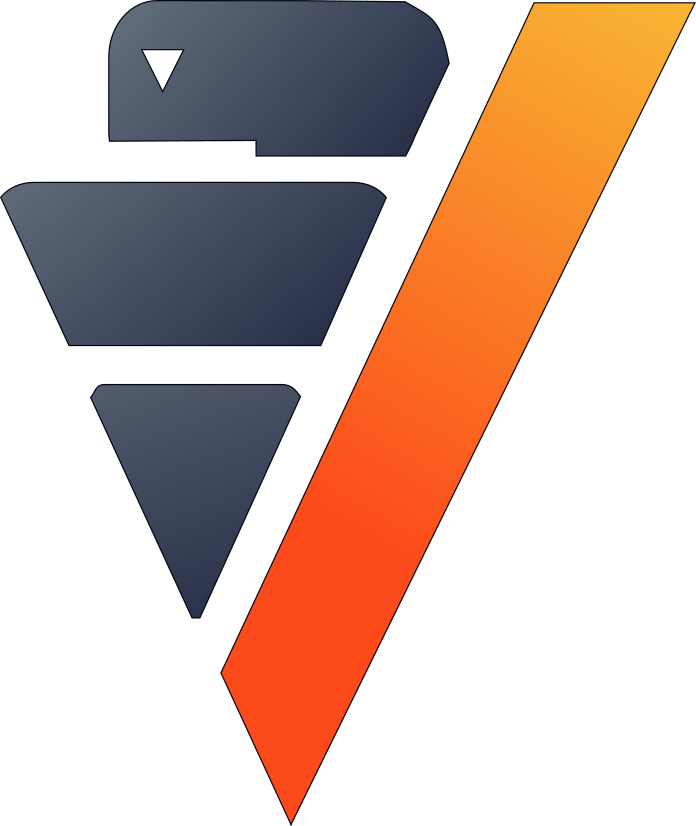

In [18]:
sm_consumption_weather = sm_consumption.join(
                            sm_weather,
                            how = "left",
                            on_interpolate = {"dateUTC": "dateUTC"},
                            expr1 = ["dateUTC", "meterID", "value"],
                            expr2 = ["humidity", "temperature"])
display(sm_consumption_weather)

In [19]:
from verticapy.learn.cluster import KMeans
model = KMeans("kmeans_sm_regions", 
               n_cluster = 5,
              init = [(-6.26980, 53.38127),
                       (-9.06178, 53.25998),
                       (-8.48641, 51.90216),
                       (-7.12408, 52.24610),
                       (-8.63985, 52.65945),])
model.drop()
model.fit(sm_meters, 
          ["longitude", "latitude"])



centers
longitude|latitude
---------+--------
-9.06178 |53.25998
-8.63985 |52.65945
-8.48641 |51.90216
-7.12408 |52.24610
-6.26980 |53.38127


metrics
Evaluation metrics:
     Total Sum of Squares: 1209.2077
     Within-Cluster Sum of Squares: 
         Cluster 0: 0.099754154
         Cluster 1: 0.2779225
         Cluster 2: 0.53464463
         Cluster 3: 0.2657853
         Cluster 4: 17.892423
     Total Within-Cluster Sum of Squares: 19.07053
     Between-Cluster Sum of Squares: 1190.1372
     Between-Cluster SS / Total SS: 98.42%
 Number of iterations performed: 1
 Converged: True
 Call:
kmeans('public.kmeans_sm_regions', '"public"."_verticapy_tmp_view_dbadmin_19482_3534752309_"', '"longitude", "latitude"', 5
USING PARAMETERS max_iterations=300, epsilon=0.0001, initial_centers_table='"public"."_verticapy_tmp_kmeans_init_dbadmin_19482_4288538844_"', distance_method='euclidean')

In [20]:
sm_meters.drop(['region'])

MissingColumn: The Virtual Column 'region' doesn't exist.

In [21]:
# adding clusters to dataframe in new column region
sm_meters = model.predict(sm_meters, name = "region")

dateUTC    meterID     value    humidity   \\
1      2014-01-02 20:45:00        148     0.236        75.0   \\
2      2014-01-02 20:45:00         89     0.451        75.0   \\
3      2014-01-02 21:00:00        919     0.349        65.0   \\
4      2014-01-02 21:00:00        792     0.801        65.0   \\
5      2014-01-02 21:00:00        713     0.422        65.0   \\
6      2014-01-02 21:00:00        702     0.362        65.0   \\
7      2014-01-02 21:00:00        411     0.496        65.0   \\
8      2014-01-02 21:00:00        230     0.249        65.0   \\
9      2014-01-02 21:00:00         73     0.431        65.0   \\
10     2014-01-02 21:15:00        790     0.934        65.0   \\
11     2014-01-02 21:15:00        753     0.296        65.0   \\
12     2014-01-02 21:15:00        746      0.61        65.0   \\
13     2014-01-02 21:15:00        502     0.857        65.0   \\
14     2014-01-02 21:15:00        488      0.96        65.0   \\
15     2014-01-02 21:15:00        194     0.887        65.0   \\
16     2014-01-02 21:15:00         29     0.293        65.0   \\
17     2014-01-02 21:30:00        867     0.344        65.0   \\
18     2014-01-02 21:30:00        730     0.233        65.0   \\
19     2014-01-02 21:30:00        653     0.685        65.0   \\
20     2014-01-02 21:30:00        593     0.396        65.0   \\
21     2014-01-02 21:30:00        421     0.129        65.0   \\
22     2014-01-02 21:30:00        226     0.399        65.0   \\
23     2014-01-02 21:30:00        200     0.169        65.0   \\
24     2014-01-02 21:45:00        939     0.815        65.0   \\
25     2014-01-02 21:45:00        888     0.475        65.0   \\
26     2014-01-02 21:45:00        713      0.95        65.0   \\
27     2014-01-02 21:45:00        580     0.676        65.0   \\
28     2014-01-02 21:45:00        393     0.323        65.0   \\
29     2014-01-02 21:45:00        344     0.606        65.0   \\
30     2014-01-02 21:45:00        302     0.928        65.0   \\
31     2014-01-02 21:45:00         47     1.336        65.0   \\
32     2014-01-02 22:00:00        851     0.496        65.0   \\
33     2014-01-02 22:00:00        400      0.09        65.0   \\
34     2014-01-02 22:00:00        297     0.463        65.0   \\
35     2014-01-02 22:00:00        230     0.711        65.0   \\
36     2014-01-02 22:15:00        903     0.529        65.0   \\
37     2014-01-02 22:15:00        866     0.225        65.0   \\
38     2014-01-02 22:15:00        800     0.595        65.0   \\
39     2014-01-02 22:15:00        749     0.435        65.0   \\
40     2014-01-02 22:15:00        393     0.471        65.0   \\
41     2014-01-02 22:15:00        253     0.832        65.0   \\
42     2014-01-02 22:15:00        237     0.213        65.0   \\
43     2014-01-02 22:30:00        697     0.451        61.0   \\
44     2014-01-02 22:30:00        403     0.409        61.0   \\
45     2014-01-02 22:30:00        255     1.699        61.0   \\
46     2014-01-02 22:30:00         63     0.379        61.0   \\
47     2014-01-02 22:45:00        844     0.758        61.0   \\
48     2014-01-02 22:45:00        694      0.86        61.0   \\
49     2014-01-02 22:45:00        419      0.82        61.0   \\
50     2014-01-02 22:45:00        374     0.296        61.0   \\
51     2014-01-02 22:45:00        294    0.1585        61.0   \\
52     2014-01-02 22:45:00        217     0.306        61.0   \\
53     2014-01-02 23:00:00        996     0.177        61.0   \\
54     2014-01-02 23:00:00        615     0.767        61.0   \\
55     2014-01-02 23:00:00        525     0.696        61.0   \\
56     2014-01-02 23:00:00        434     1.804        61.0   \\
57     2014-01-02 23:00:00        411     0.183        61.0   \\
58     2014-01-02 23:00:00        410     0.806        61.0   \\
59     2014-01-02 23:00:00        403     0.249        61.0   \\
60     2014-01-02 23:15:00        893     0.343        61.0   \\
61     2014-01-02 23:15:00        814     0.263       
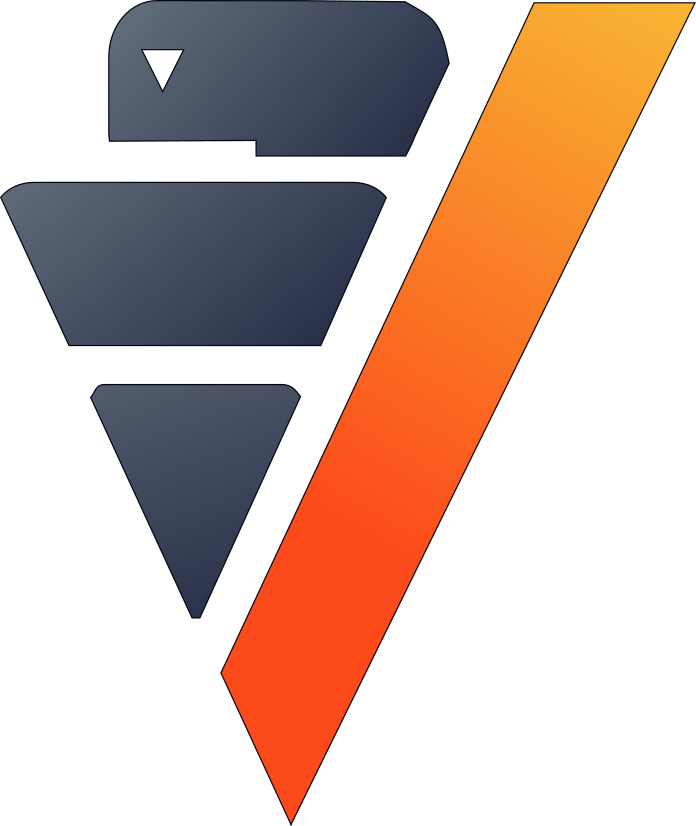

In [22]:
sm_consumption_weather_region = sm_consumption_weather.join(
                                    sm_meters,
                                    how = "natural",
                                    expr1 = ["*"],
                                    expr2 = ["residenceType", 
                                             "region"])
display(sm_consumption_weather_region)

Now we have dates, meters, energy, weather stats, and what region it belongs to

<AxesSubplot:xlabel='"longitude"', ylabel='"latitude"'>

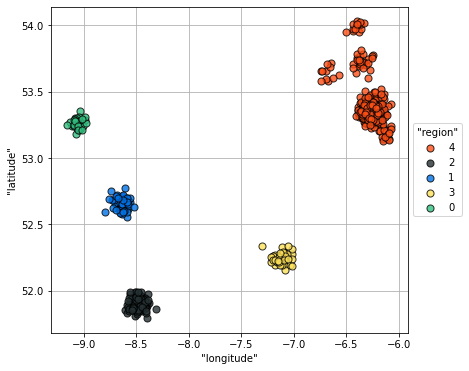

In [23]:
sm_meters.scatter(["longitude", "latitude"], 
                  catcol = "region")

count    percent  
"dateUTC"            1188432.0      100.0  
"meterID"            1188432.0      100.0  
"humidity"           1188432.0      100.0  
"temperature"        1188432.0      100.0  
"residenceType"      1188432.0      100.0  
"region"             1188432.0      100.0  
"value"              1188412.0     99.998  
Rows: 1-7 | Columns: 3
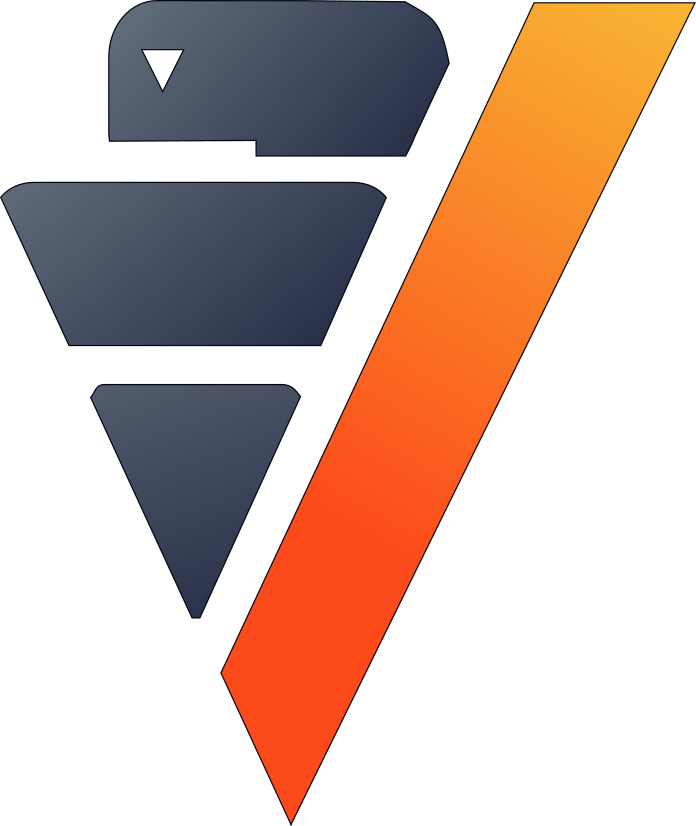

In [24]:
sm_consumption_weather_region.count_percent()

20 elements were filtered.


count  
"dateUTC"            1188412.0  
"meterID"            1188412.0  
"value"              1188412.0  
"humidity"           1188412.0  
"temperature"        1188412.0  
"residenceType"      1188412.0  
"region"             1188412.0  
Rows: 1-7 | Columns: 2
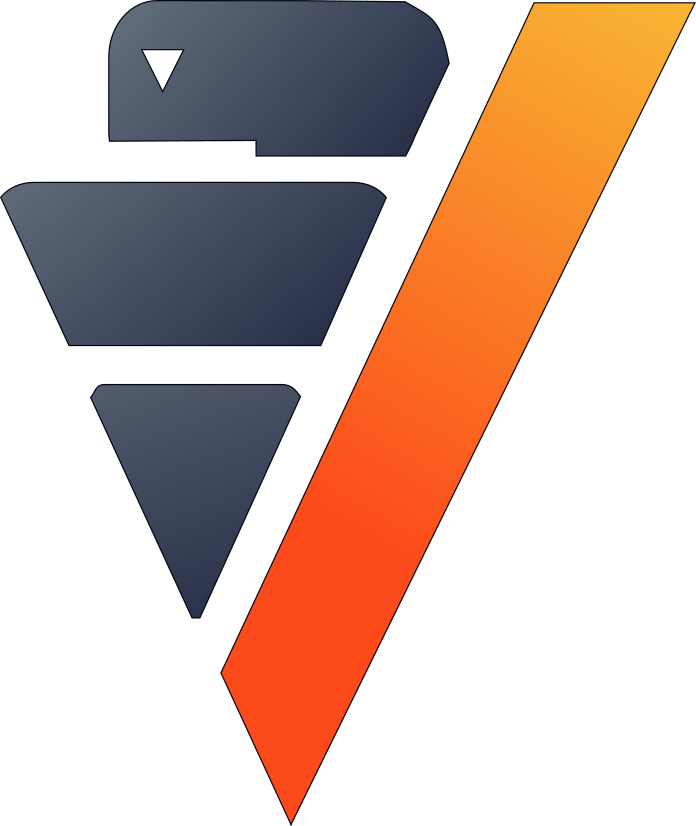

In [25]:
#Drop some missing values
sm_consumption_weather_region["value"].dropna()
sm_consumption_weather_region.count()


In [27]:
# Save new dataset to DB
drop("sm_consumption_weather_region", method = "table")
sm_consumption_weather_region.to_db("sm_consumption_weather_region",
                                    relation_type = "table")
sm_consumption_weather_region_clean = vDataFrame("sm_consumption_weather_region")

To get an equally-sliced dataset, we can then interpolate to fill any gaps. This operation is essential for creating correct time series models.

dateUTC    meterID                 value            humidity   \\
1      2014-01-01 16:30:00         41                 0.073                87.0   \\
2      2014-01-01 17:00:00         41    0.0880892857142857    86.7857142857143   \\
3      2014-01-01 17:30:00         41     0.103178571428571    86.5714285714286   \\
4      2014-01-01 18:00:00         41     0.118267857142857    86.3571428571429   \\
5      2014-01-01 18:30:00         41     0.133357142857143    86.1428571428571   \\
6      2014-01-01 19:00:00         41     0.148446428571429    85.9285714285714   \\
7      2014-01-01 19:30:00         41     0.163535714285714    85.7142857142857   \\
8      2014-01-01 20:00:00         41              0.178625                85.5   \\
9      2014-01-01 20:30:00         41     0.193714285714286    85.2857142857143   \\
10     2014-01-01 21:00:00         41     0.208803571428571    85.0714285714286   \\
11     2014-01-01 21:30:00         41     0.223892857142857    84.8571428571429   \\
12     2014-01-01 22:00:00         41     0.238982142857143    84.6428571428571   \\
13     2014-01-01 22:30:00         41     0.254071428571429    84.4285714285714   \\
14     2014-01-01 23:00:00         41     0.269160714285714    84.2142857142857   \\
15     2014-01-01 23:30:00         41               0.28425                84.0   \\
16     2014-01-02 00:00:00         41     0.299339285714286    83.7857142857143   \\
17     2014-01-02 00:30:00         41     0.314428571428571    83.5714285714286   \\
18     2014-01-02 01:00:00         41     0.329517857142857    83.3571428571429   \\
19     2014-01-02 01:30:00         41     0.344607142857143    83.1428571428571   \\
20     2014-01-02 02:00:00         41     0.359696428571429    82.9285714285714   \\
21     2014-01-02 02:30:00         41     0.374785714285714    82.7142857142857   \\
22     2014-01-02 03:00:00         41              0.389875                82.5   \\
23     2014-01-02 03:30:00         41     0.404964285714286    82.2857142857143   \\
24     2014-01-02 04:00:00         41     0.420053571428571    82.0714285714286   \\
25     2014-01-02 04:30:00         41     0.435142857142857    81.8571428571429   \\
26     2014-01-02 05:00:00         41     0.450232142857143    81.6428571428571   \\
27     2014-01-02 05:30:00         41     0.465321428571429    81.4285714285714   \\
28     2014-01-02 06:00:00         41     0.480410714285714    81.2142857142857   \\
29     2014-01-02 06:30:00         41                0.4955                81.0   \\
30     2014-01-02 07:00:00         41     0.510589285714286    80.7857142857143   \\
31     2014-01-02 07:30:00         41     0.525678571428571    80.5714285714286   \\
32     2014-01-02 08:00:00         41     0.540767857142857    80.3571428571429   \\
33     2014-01-02 08:30:00         41     0.555857142857143    80.1428571428571   \\
34     2014-01-02 09:00:00         41     0.570946428571429    79.9285714285714   \\
35     2014-01-02 09:30:00         41     0.586035714285714    79.7142857142857   \\
36     2014-01-02 10:00:00         41              0.601125                79.5   \\
37     2014-01-02 10:30:00         41     0.616214285714286    79.2857142857143   \\
38     2014-01-02 11:00:00         41     0.631303571428572    79.0714285714286   \\
39     2014-01-02 11:30:00         41     0.646392857142857    78.8571428571429   \\
40     2014-01-02 12:00:00         41     0.661482142857143    78.6428571428571   \\
41     2014-01-02 12:30:00         41     0.676571428571429    78.4285714285714   \\
42     2014-01-02 13:00:00         41     0.691660714285714    78.2142857142857   \\
43     2014-01-02 13:30:00         41               0.70675                78.0   \\
44     2014-01-02 14:00:00         41     0.721839285714286    77.7857142857143   \\
45     2014-01-02 14:30:00         41     0.736928571428571    77.5714285714286   \\
46     2014-01-02 15:00:00         41     0.752017857142857    77.3571428571429   \\
47     2014-01-02 15:30:
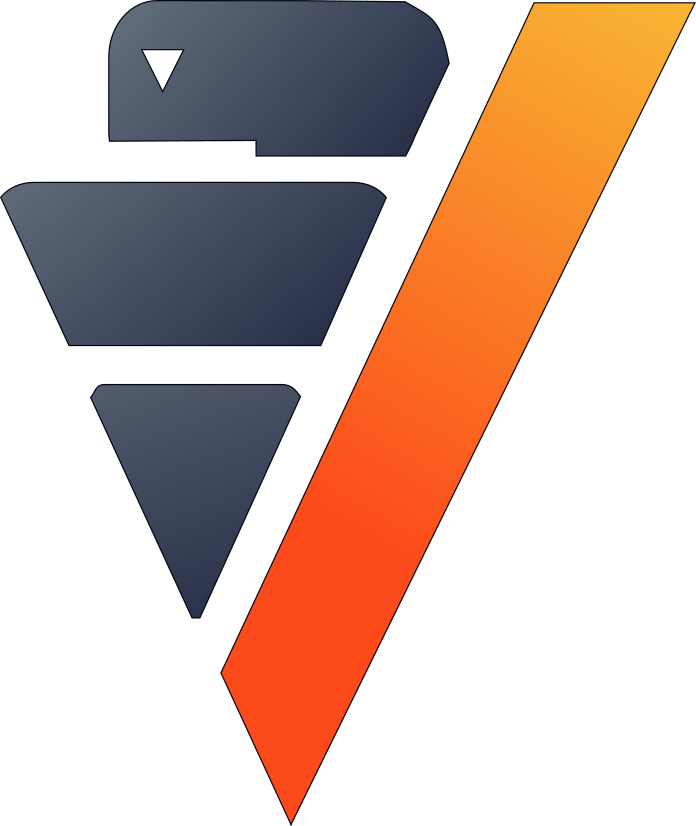

In [28]:
sm_consumption_weather_region_clean = sm_consumption_weather_region_clean.interpolate(
                                                                        ts = "dateUTC",
                                                                        rule = "30 minutes",
                                                                        method = {"value": "linear",
                                                                                  "humidity": "linear",
                                                                                  "temperature": "linear",
                                                                                  "residenceType": "ffill",
                                                                                  "region": "ffill"},
                                                                        by = ["meterID"])
display(sm_consumption_weather_region_clean)

Let's interpolate and aggregate the data to get a monthly average in electricity consumption per region.

1000 elements were filtered.


meterID    region    residenceType    month             date_month   \\
1            5         4                1        1    2014-01-01 00:00:00   \\
2            5         4                1        1    2015-01-01 00:00:00   \\
3            5         4                1        2    2014-02-01 00:00:00   \\
4            5         4                1        2    2015-02-01 00:00:00   \\
5            5         4                1        3    2014-03-01 00:00:00   \\
6            5         4                1        3    2015-03-01 00:00:00   \\
7            5         4                1        4    2014-04-01 00:00:00   \\
8            5         4                1        4    2015-04-01 00:00:00   \\
9            5         4                1        5    2014-05-01 00:00:00   \\
10           5         4                1        5    2015-05-01 00:00:00   \\
11           5         4                1        6    2014-06-01 00:00:00   \\
12           5         4                1        6    2015-06-01 00:00:00   \\
13           5         4                1        7    2014-07-01 00:00:00   \\
14           5         4                1        7    2015-07-01 00:00:00   \\
15           5         4                1        8    2014-08-01 00:00:00   \\
16           5         4                1        8    2015-08-01 00:00:00   \\
17           5         4                1        9    2014-09-01 00:00:00   \\
18           5         4                1       10    2014-10-01 00:00:00   \\
19           5         4                1       11    2014-11-01 00:00:00   \\
20           5         4                1       12    2014-12-01 00:00:00   \\
21          18         4                1        1    2014-01-01 00:00:00   \\
22          18         4                1        1    2015-01-01 00:00:00   \\
23          18         4                1        2    2014-02-01 00:00:00   \\
24          18         4                1        2    2015-02-01 00:00:00   \\
25          18         4                1        3    2014-03-01 00:00:00   \\
26          18         4                1        3    2015-03-01 00:00:00   \\
27          18         4                1        4    2014-04-01 00:00:00   \\
28          18         4                1        4    2015-04-01 00:00:00   \\
29          18         4                1        5    2014-05-01 00:00:00   \\
30          18         4                1        5    2015-05-01 00:00:00   \\
31          18         4                1        6    2014-06-01 00:00:00   \\
32          18         4                1        6    2015-06-01 00:00:00   \\
33          18         4                1        7    2014-07-01 00:00:00   \\
34          18         4                1        7    2015-07-01 00:00:00   \\
35          18         4                1        8    2014-08-01 00:00:00   \\
36          18         4                1        8    2015-08-01 00:00:00   \\
37          18         4                1        9    2014-09-01 00:00:00   \\
38          18         4                1       10    2014-10-01 00:00:00   \\
39          18         4                1       11    2014-11-01 00:00:00   \\
40          18         4                1       12    2014-12-01 00:00:00   \\
41          19         4                1        1    2014-01-01 00:00:00   \\
42          19         4                1        1    2015-01-01 00:00:00   \\
43          19         4                1        2    2014-02-01 00:00:00   \\
44          19         4                1        2    2015-02-01 00:00:00   \\
45          19         4                1        3    2014-03-01 00:00:00   \\
46          19         4                1        3    2015-03-01 00:00:00   \\
47          19         4                1        4    2014-04-01 00:00:00   \\
48          19         4                1        4    2015-04-01 00:00:00   \\
49          19         4                1        5    2014-05-01 00:00:00   \\
50          19         4                1        5    201
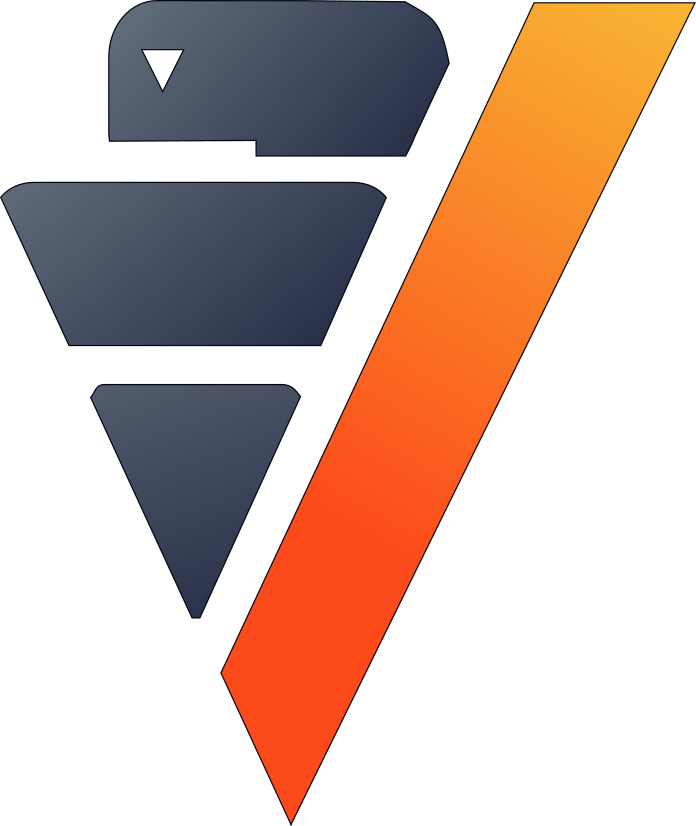

In [29]:
import verticapy.stats as st
sm_consumption_month = sm_consumption_weather_region_clean.groupby(
                    columns = ["meterID",
                               "region", 
                               "residenceType",
                               "MONTH(dateUTC) AS month",
                               "DATE_TRUNC('MONTH', dateUTC::date) AS date_month"],
                    expr = [st.sum(sm_consumption_weather_region["value"])._as("value"),
                            st.avg(sm_consumption_weather_region["temperature"])._as("avg_temperature"),
                            st.avg(sm_consumption_weather_region["humidity"])._as("avg_humidity")]).filter(
                                                                                    "date_month < '2015-09-01'")
drop("sm_consumption_month", method = "table")
sm_consumption_month.to_db("sm_consumption_month",
                           relation_type = "table",
                           inplace = True)

We have for each meter, and each month, the total energy usage, and average temperatures and humidity

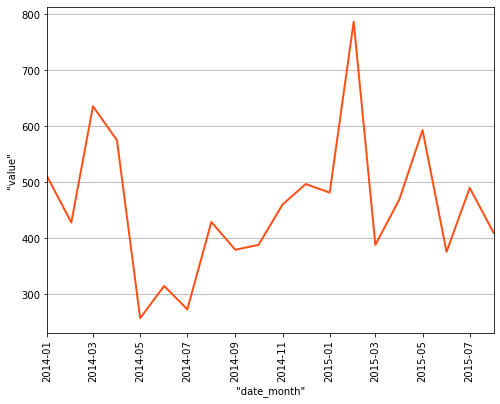

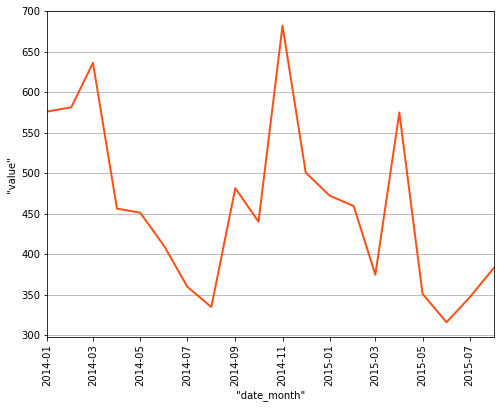

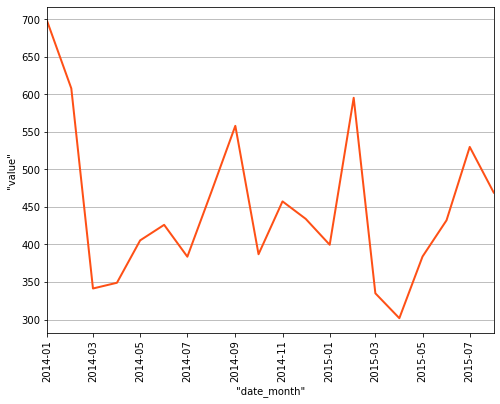

In [30]:
# Looking at 3 meters in particular
for i in [10, 12, 14]:
    sm_consumption_month[sm_consumption_month["meterID"] == i]["value"].plot(ts = "date_month")

meterID    region    residenceType    month             date_month   \\
1        364         2                1       12    2014-12-01 00:00:00   \\
2        809         4                1       11    2014-11-01 00:00:00   \\
3        951         4                1        4    2015-04-01 00:00:00   \\
4        399         4                1       10    2014-10-01 00:00:00   \\
                value     avg_temperature        avg_humidity   \\
1    1852.04580636529    39.2305333549752    89.9652523028262   \\
2    1300.55731708241    45.5709955755231    86.4715802984117   \\
3    2128.45466198574      48.16211775914    73.6313461768108   \\
4    1589.23770463456    52.7068558110441    88.7730360914782   \\
         value_zscore  
1    4.00855200430863  
2     4.0151606376986  
3    4.01829822269677  
4    4.07298404322647  
Rows: 1-4 | Columns: 9
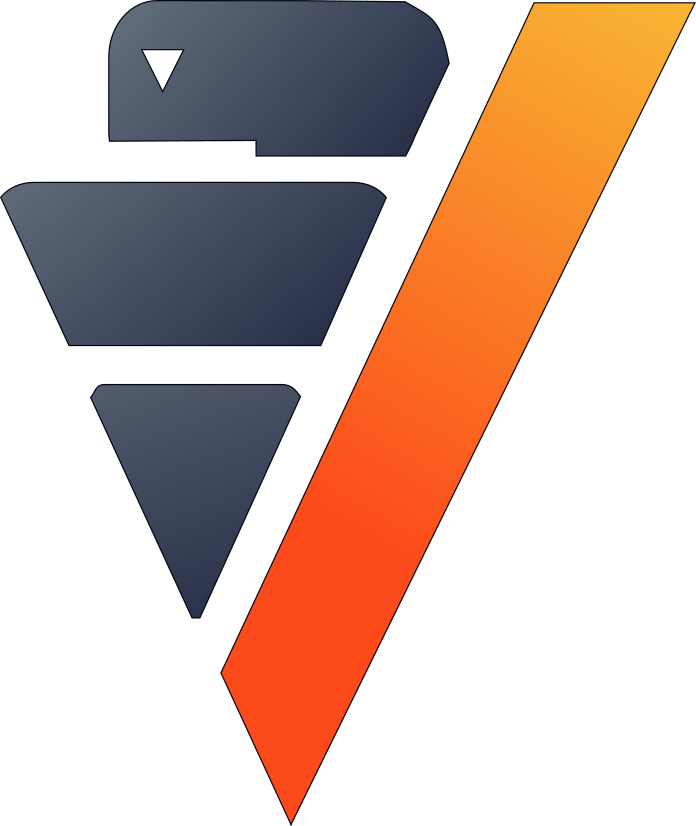

In [31]:
std = st.std(sm_consumption_month["value"])._over(by = [sm_consumption_month["meterID"]])
avg = st.avg(sm_consumption_month["value"])._over(by = [sm_consumption_month["meterID"]])
sm_consumption_month["value_zscore"] = (sm_consumption_month["value"] - avg) / std
sm_consumption_month.search("value_zscore > 4")

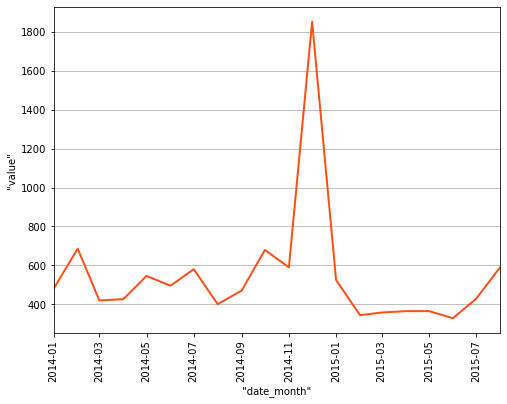

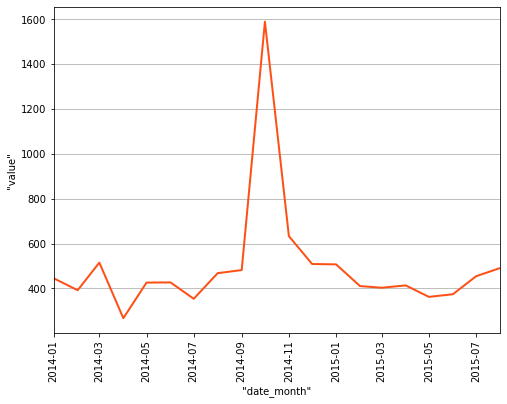

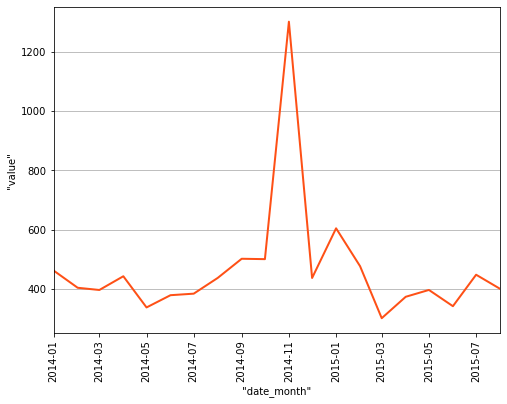

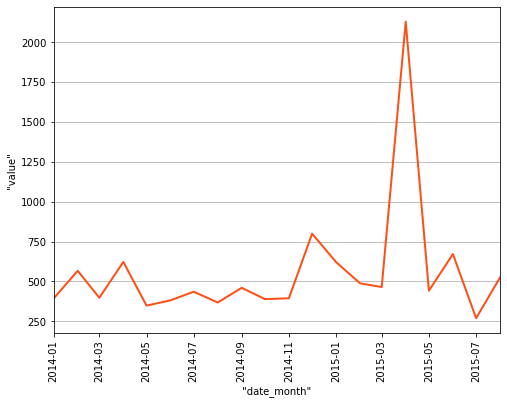

In [32]:
for i in [364, 399, 809, 951]:
    sm_consumption_month[sm_consumption_month["meterID"] == i]["value"].plot(ts = "date_month")

Since most of our data is categorical, let's encode them with One-hot encoding. We can then examine the correlations between the various categories.



meterID    region    residenceType    month             date_month   \\
1            1         4                1        1    2014-01-01 00:00:00   \\
2            1         4                1        1    2015-01-01 00:00:00   \\
3            1         4                1        2    2014-02-01 00:00:00   \\
4            1         4                1        2    2015-02-01 00:00:00   \\
5            1         4                1        3    2014-03-01 00:00:00   \\
6            1         4                1        3    2015-03-01 00:00:00   \\
7            1         4                1        4    2014-04-01 00:00:00   \\
8            1         4                1        4    2015-04-01 00:00:00   \\
9            1         4                1        5    2014-05-01 00:00:00   \\
10           1         4                1        5    2015-05-01 00:00:00   \\
11           1         4                1        6    2014-06-01 00:00:00   \\
12           1         4                1        6    2015-06-01 00:00:00   \\
13           1         4                1        7    2014-07-01 00:00:00   \\
14           1         4                1        7    2015-07-01 00:00:00   \\
15           1         4                1        8    2014-08-01 00:00:00   \\
16           1         4                1        8    2015-08-01 00:00:00   \\
17           1         4                1        9    2014-09-01 00:00:00   \\
18           1         4                1       10    2014-10-01 00:00:00   \\
19           1         4                1       11    2014-11-01 00:00:00   \\
20           1         4                1       12    2014-12-01 00:00:00   \\
21           4      None             None        1    2014-01-01 00:00:00   \\
22           4         4                1        1    2014-01-01 00:00:00   \\
23           4         4                1        1    2015-01-01 00:00:00   \\
24           4         4                1        2    2014-02-01 00:00:00   \\
25           4         4                1        2    2015-02-01 00:00:00   \\
26           4         4                1        3    2014-03-01 00:00:00   \\
27           4         4                1        3    2015-03-01 00:00:00   \\
28           4         4                1        4    2014-04-01 00:00:00   \\
29           4         4                1        4    2015-04-01 00:00:00   \\
30           4         4                1        5    2014-05-01 00:00:00   \\
31           4         4                1        5    2015-05-01 00:00:00   \\
32           4         4                1        6    2014-06-01 00:00:00   \\
33           4         4                1        6    2015-06-01 00:00:00   \\
34           4         4                1        7    2014-07-01 00:00:00   \\
35           4         4                1        7    2015-07-01 00:00:00   \\
36           4         4                1        8    2014-08-01 00:00:00   \\
37           4         4                1        8    2015-08-01 00:00:00   \\
38           4         4                1        9    2014-09-01 00:00:00   \\
39           4         4                1       10    2014-10-01 00:00:00   \\
40           4         4                1       11    2014-11-01 00:00:00   \\
41           4         4                1       12    2014-12-01 00:00:00   \\
42           5         4                1        1    2014-01-01 00:00:00   \\
43           5         4                1        1    2015-01-01 00:00:00   \\
44           5         4                1        2    2014-02-01 00:00:00   \\
45           5         4                1        2    2015-02-01 00:00:00   \\
46           5         4                1        3    2014-03-01 00:00:00   \\
47           5         4                1        3    2015-03-01 00:00:00   \\
48           5         4                1        4    2014-04-01 00:00:00   \\
49           5         4                1        4    2015-04-01 00:00:00   \\
50           5         4                1        5    201
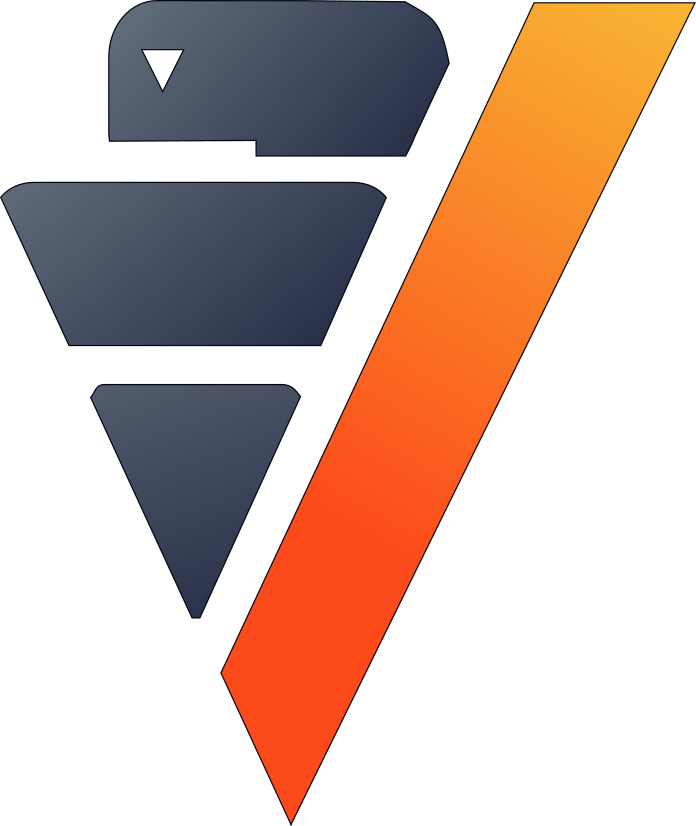

In [33]:
sm_consumption_month = sm_consumption_month.one_hot_encode(["region", "residenceType", "month"], 
                                                           drop_first = False,
                                                           max_cardinality = 20)
display(sm_consumption_month)

"meterID"                "region"          "residenceType"   \\
"meterID"                                1.0     -0.0383154119269016       0.0980146907774023   \\
"region"                 -0.0383154119269016                     1.0       0.0166975561248509   \\
"residenceType"           0.0980146907774023      0.0166975561248509                      1.0   \\
"month"                -0.000958239223703914                     0.0                      0.0   \\
"value"                 0.000429585019151564     0.00391838085846208    -0.000588213256714113   \\
"avg_temperature"      -0.000388408483344194    0.000771742974797209    -0.000214800019062263   \\
"avg_humidity"         -0.000368327647064361    -0.00217981408381952      0.00183889966176371   \\
"value_zscore"         -2.65438505209951e-18    -1.4424331749849e-18    -8.29627252506665e-18   \\
"region_0"                    0.013651309137      -0.564373811092644     -0.00435561722873074   \\
"region_1"                0.0466265869557577      -0.539485038229266      0.00168175653142086   \\
"region_2"               0.00328987359897663      -0.474356114920355     -0.00460956649743866   \\
"region_3"                -0.013700995176311     -0.0850796152695257      -0.0623601449658743   \\
"region_4"               -0.0265760464510187       0.907172644025799       0.0350513980015978   \\
"residenceType_1"         -0.102365768266218     -0.0310062198052858       -0.964066970378623   \\
"residenceType_2"         0.0467577567557462      0.0574944611713134       0.0987873344174206   \\
"residenceType_3"         0.0816737879786041    0.000324658415336287        0.960040414014256   \\
"month_1"                0.00182472281671094                     0.0                      0.0   \\
"month_2"              -0.000222116232717449                     0.0                      0.0   \\
"month_3"              -0.000222116232717449                     0.0                      0.0   \\
"month_4"              -0.000222116232717449                     0.0                      0.0   \\
"month_5"              -0.000222116232717449                     0.0                      0.0   \\
"month_6"              -0.000222116232717449                     0.0                      0.0   \\
"month_7"              -0.000222116232717449                     0.0                      0.0   \\
"month_8"              -0.000222116232717449                     0.0                      0.0   \\
"month_9"              -0.000152971646153471                     0.0                      0.0   \\
"month_10"             -0.000152971646153471                     0.0                      0.0   \\
"month_11"             -0.000152971646153471                     0.0                      0.0   \\
"month_12"             -0.000152971646153471                     0.0                      0.0   \\
                                     "month"                  "value"        "avg_temperature"   \\
"meterID"              -0.000958239223703914     0.000429585019151564    -0.000388408483344194   \\
"region"                                 0.0      0.00391838085846208     0.000771742974797209   \\
"residenceType"                          0.0    -0.000588213256714113    -0.000214800019062263   \\
"month"                                  1.0      -0.0631050387695447        0.469805916060235   \\
"value"                  -0.0631050387695447                      1.0       -0.286002119828816   \\
"avg_temperature"          0.469805916060235       -0.286002119828816                      1.0   \\
"avg_humidity"           -0.0101794307860959        0.226840366291103       -0.658481080772198   \\
"value_zscore"           -0.0673472424493419        0.934346221805545       -0.309447511959129   \\
"region_0"               0.00589382858218876     -0.00416924243520286    -0.000725793447763913   \\
"region_1"                0.0079672351655185      -0.0038224112196747    -0.000488976526298778   \\
"region_2"                0.0119564967832839      0.002592946846
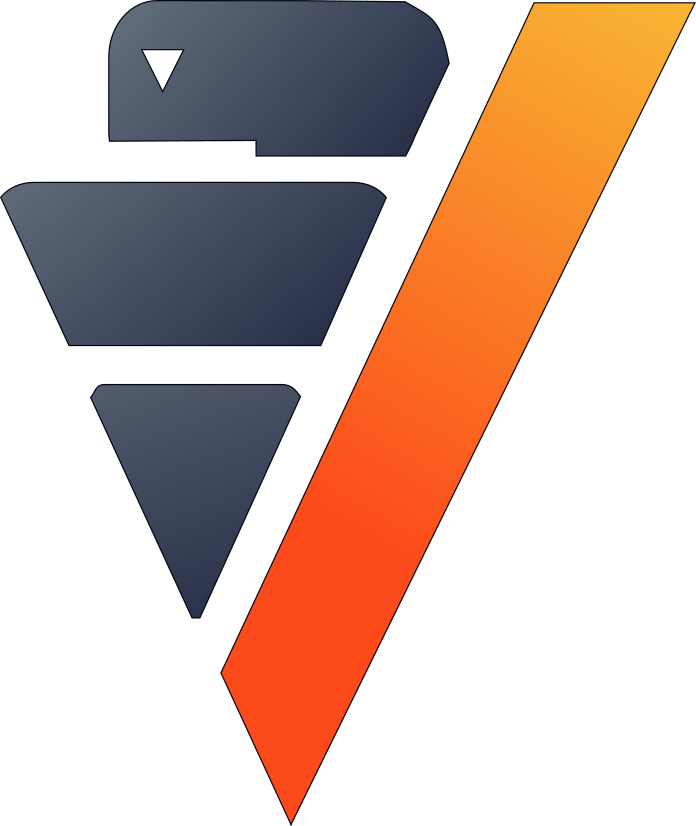

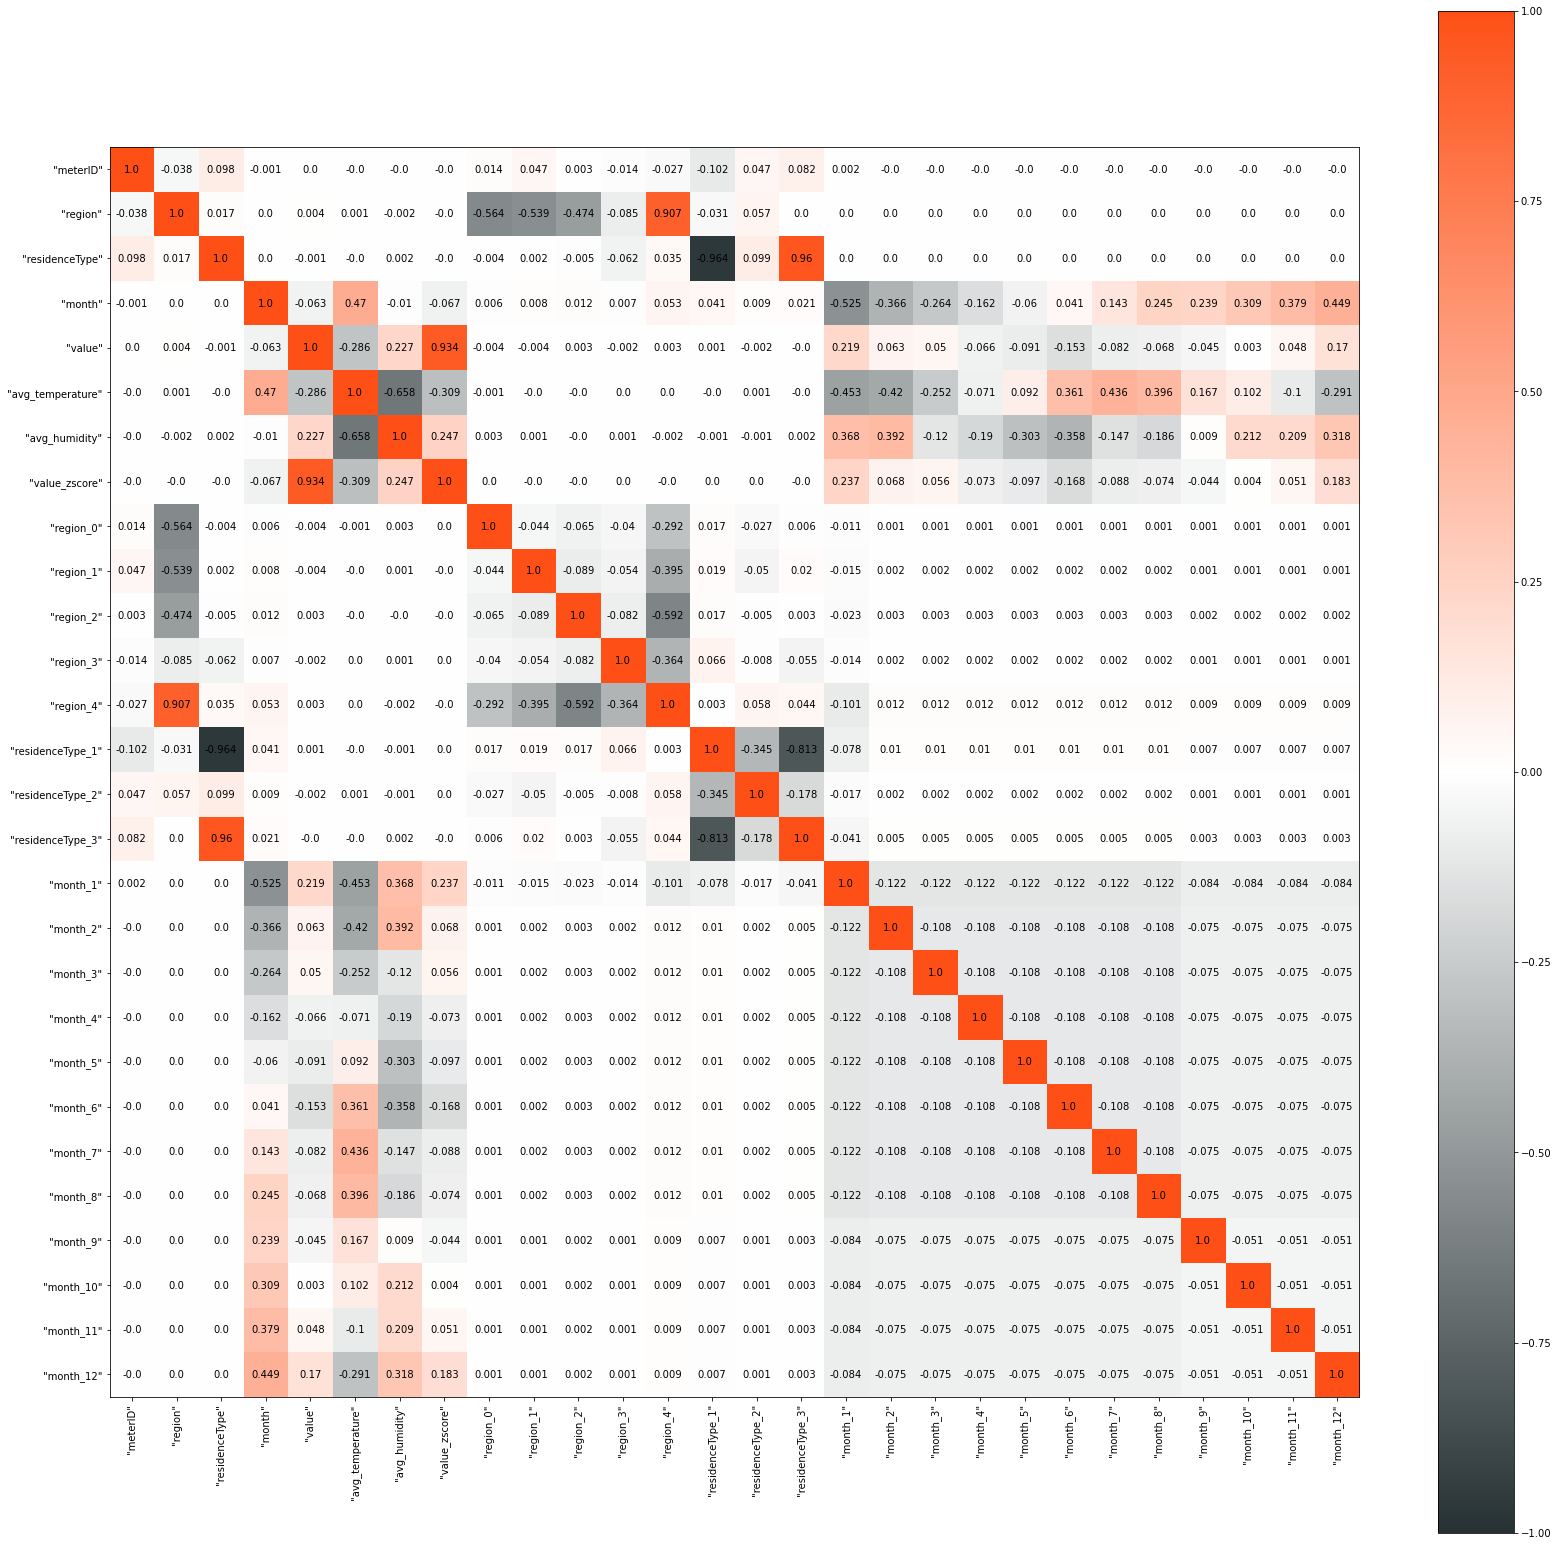

In [34]:
sm_consumption_month.corr()

"value"  
"value"                                  1.0  
"value_zscore"             0.934346221805545  
"avg_temperature"         -0.286002119828816  
"avg_humidity"             0.226840366291103  
"month_1"                  0.219480342881372  
"month_12"                  0.17020343055432  
"month_6"                 -0.152884648437897  
"month_5"                -0.0912080556448163  
"month_7"                -0.0821649426287539  
"month_8"                -0.0682407716347826  
"month_4"                 -0.066190123743121  
"month_2"                 0.0633433193874831  
"month"                  -0.0631050387695447  
"month_3"                 0.0503407640346704  
"month_11"                0.0476690731851527  
"month_9"                -0.0450040710314458  
"region_0"              -0.00416924243520286  
"region"                 0.00391838085846208  
"region_1"               -0.0038224112196747  
"region_4"               0.00268770872380868  
"month_10"                0.0026677989471872  
"region_2"               0.00259294684655871  
"region_3"              -0.00184644046736161  
"residenceType_2"       -0.00178196776030778  
"residenceType_1"         0.0010272874746086  
"residenceType"        -0.000588213256714113  
"meterID"               0.000429585019151564  
"residenceType_3"      -7.98952664889715e-05  
Rows: 1-28 | Columns: 2
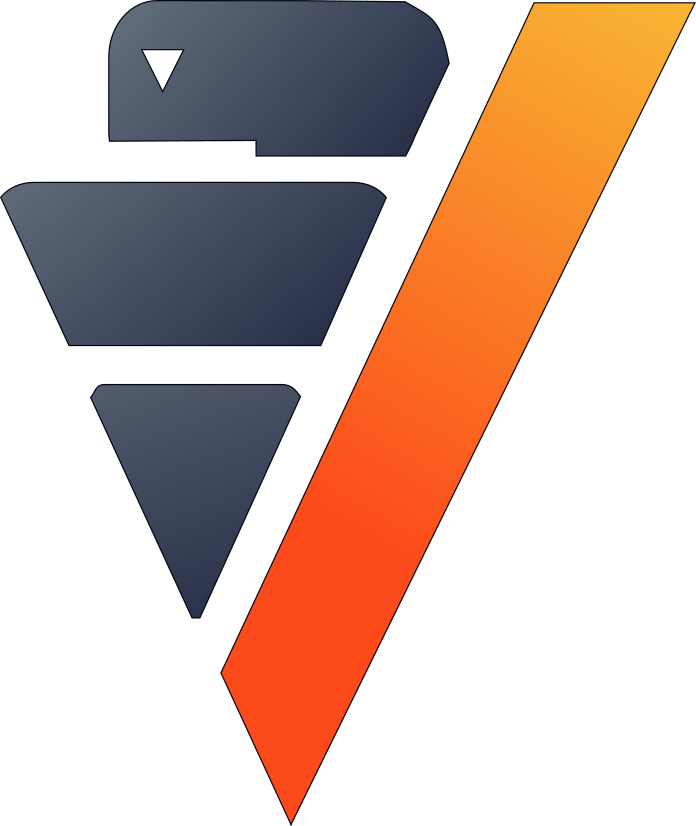

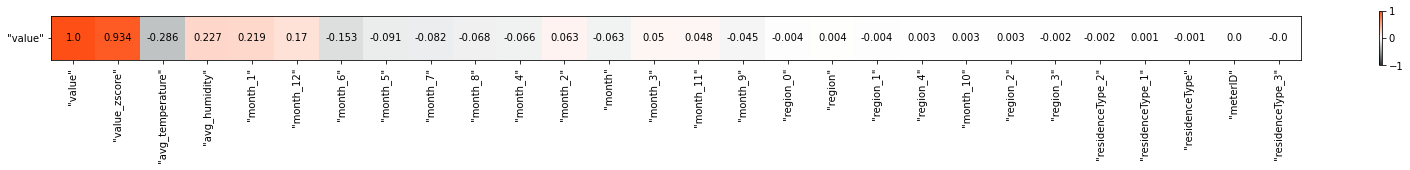

In [36]:
sm_consumption_month.corr(focus = "value")

There's a clear correlation between the month and energy consumption, but this isn't causal. Instead, we can think of the weather as having the direct influence on energy consumption. To accomodate for this view, we'll use the temperature as a predictor (rather than the month).

Lets look at this globally

<AxesSubplot:xlabel='"date_month"', ylabel='"avg_value"'>

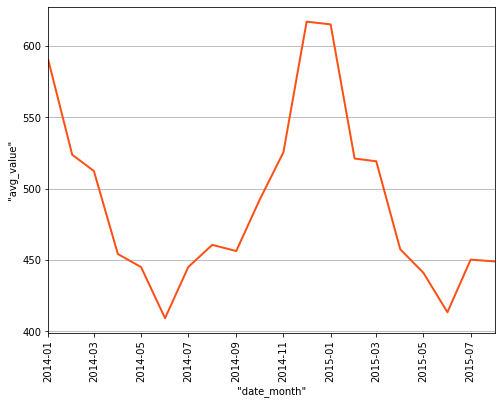

In [37]:
sm_consumption_final = sm_consumption_month.groupby(
                            ["date_month"], 
                            [st.avg(sm_consumption_month["avg_temperature"])._as("avg_temperature"),
                             st.avg(sm_consumption_month["avg_humidity"])._as("avg_humidity"),
                             st.avg(sm_consumption_month["value"])._as("avg_value")])
sm_consumption_final.plot(ts = "date_month", columns = ["avg_value"])

We expect to see a fall in energy consumption during summer and then an increase during the winter. A simple prediction could use the average value a year before.

0.987990336935642

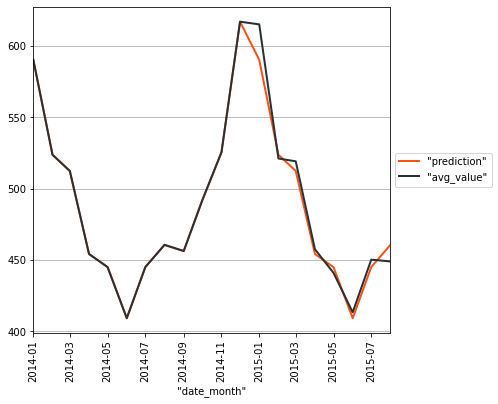

In [38]:
sm_consumption_final["prediction"] = st.case_when(sm_consumption_final["date_month"] < '2015-01-01', 
                                                  sm_consumption_final["avg_value"],
                                                  st.lag(sm_consumption_final["avg_value"], 12)._over(
                                                                                order_by = ["date_month"]))
sm_consumption_final.plot(ts = "date_month", columns = ["prediction", "avg_value"])
sm_consumption_final.score("avg_value", "prediction", "r2")

As expected, our model's score is excellent.

Let's use machine learning to understand the influence of the weather and the humidity on energy consumption.

value  
Dep. Variable                     "avg_value"  
Model                        LinearRegression  
No. Observations                         20.0  
No. Predictors                              2  
R-squared                   0.799113694213523  
Adj. R-squared             0.7754800111798198  
F-statistic                 33.81249096905816  
Prob (F-statistic)      3.837253952408389e-07  
Kurtosis                  -0.0457129692471314  
Skewness                    0.893296166786614  
Jarque-Bera (JB)              3.6514076078065  
Rows: 1-11 | Columns: 2
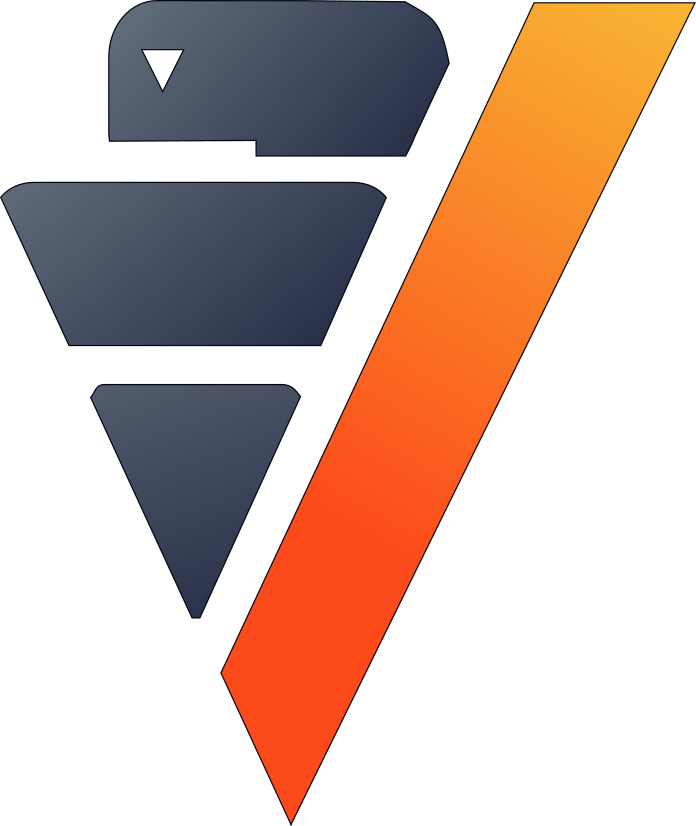

In [39]:
from verticapy.learn.linear_model import LinearRegression

predictors = ["avg_temperature",
              "avg_humidity"]
model = LinearRegression("sm_lr", solver = "BFGS")
model.fit(sm_consumption_final, 
          predictors,
          "avg_value")
model.report("details")

The model seems to be good with an adjusted R2 of 77.5%, and the F-Statistic indicates that at least one of the two predictors is useful. Let's look at the residual plot.

<AxesSubplot:xlabel='"avg_value"', ylabel='"residual"'>

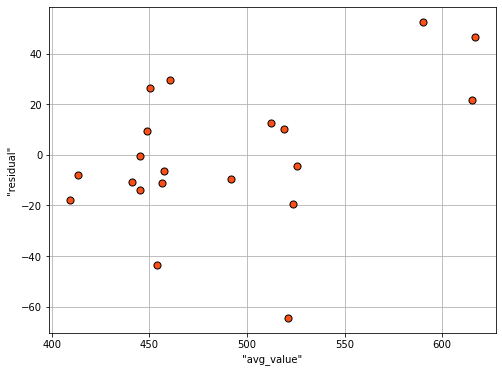

In [40]:
sm_consumption_final = model.predict(sm_consumption_final, 
                                     name = "value_prediction")
sm_consumption_final["residual"] = sm_consumption_final["avg_value"] - sm_consumption_final["value_prediction"]
sm_consumption_final.scatter(["avg_value", "residual"])

value  
explained_variance            0.799113694213524  
max_error                       64.450370044575  
median_absolute_error          13.1054316247273  
mean_absolute_error            20.9034976459433  
mean_squared_error              734.33259460088  
root_mean_squared_error       27.09857181847191  
r2                            0.799113694213523  
r2_adj                       0.7754800111798198  
aic                          139.47924104286193  
bic                           140.9664378635239  
Rows: 1-10 | Columns: 2
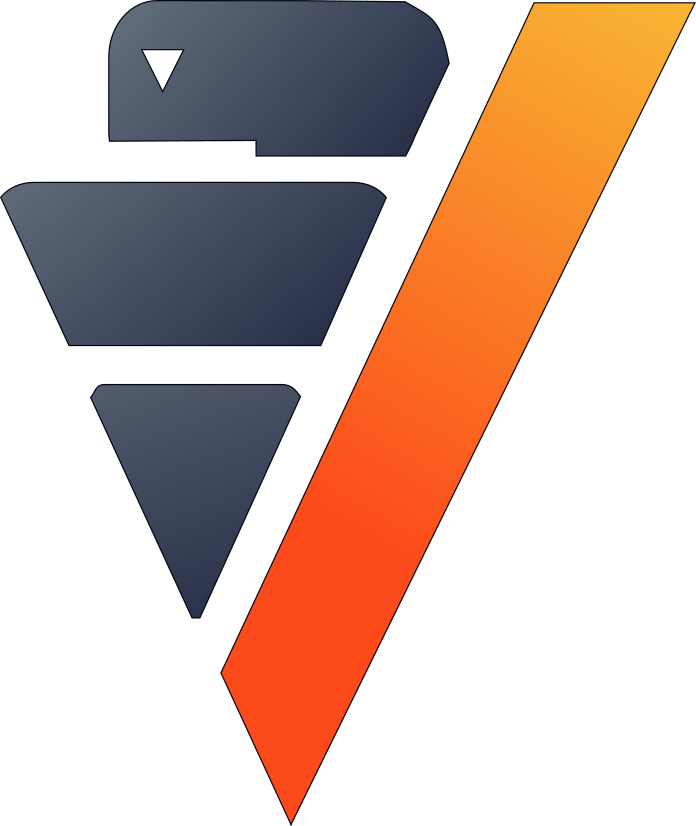

In [41]:
model.report()

Our model is very good; its median absolute error is around 13kWh.

With this model, we can make predictions about the energy consumption of households per region. If the usage exceeds what the model predicts, we can raise an alert and respond, for example, by regulating the electricity distributed to the region.